# 1. CONEXÃO E CARGA DOS DADOS (ETL)

## Conexão com repositório - git clone

In [1]:
!git clone https://github.com/sfer26/entrevista-dados.git
%cd entrevista-dados

Cloning into 'entrevista-dados'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 5.18 KiB | 5.18 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/entrevista-dados


In [2]:
%ls

LICENSE  README.md


## Pipeline dos Dados (GCP -> COLAB)

In [3]:
!pip install google-cloud-firestore

In [4]:
import pandas as pd

In [5]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# # VERIFICAR AUTENTICAÇÃO
# print("=== VERIFICANDO AUTENTICAÇÃO ===")
# import os
# from google.auth import default
# from google.cloud import firestore

# try:
#     credentials, project = default()
#     print(f"✅ Autenticação OK - Projeto detectado: {project}")
#     print(f"✅ Tipo de credencial: {type(credentials)}")
# except Exception as e:
#     print(f"❌ Erro na autenticação: {e}")

=== VERIFICANDO AUTENTICAÇÃO ===
✅ Autenticação OK - Projeto detectado: 
✅ Tipo de credencial: <class 'google.auth.compute_engine.credentials.Credentials'>


In [ ]:
# # VERIFICAR CONEXÃO COM FIRESTORE
# print("\n=== TESTANDO CONEXÃO FIRESTORE ===")
# project_id = 'entrevistas-470214'
# database_id = 'entrevista'

# try:
#     # Tenta conectar usando o database específico
#     db = firestore.Client(project=project_id, database=database_id)
#     print(f"✅ Cliente Firestore criado para database: {database_id}")

#     # Listar coleções raiz
#     print("\n--- Tentando listar coleções raiz ---")
#     collections = list(db.collections())
#     if collections:
#         print(f"✅ Coleções encontradas: {[col.id for col in collections]}")
#     else:
#         print("⚠️  Nenhuma coleção encontrada (pode ser normal)")

# except Exception as e:
#     print(f"❌ Erro ao conectar no Firestore: {e}")

#     # Tenta usar database default
#     print("\n--- Tentando database padrão ---")
#     try:
#         db = firestore.Client(project=project_id)
#         print("✅ Conectado ao database padrão")
#     except Exception as e2:
#         print(f"❌ Erro também no database padrão: {e2}")



=== TESTANDO CONEXÃO FIRESTORE ===
✅ Cliente Firestore criado para database: entrevista

--- Tentando listar coleções raiz ---
✅ Coleções encontradas: ['shoppingCart', 'shoppingCartV2']


In [ ]:
# # VERIFICAR ESTRUTURA DE DADOS
# # Verificar se a coleção raiz 'entrevista' existe
# try:
#     entrevista_ref = db.collection('entrevista')
#     entrevista_docs = list(entrevista_ref.limit(1).stream())

#     if entrevista_docs:
#         print(f"✅ Coleção 'entrevista' existe - encontrados docs: {[doc.id for doc in entrevista_docs]}")
#     else:
#         print("⚠️  Coleção 'entrevista' vazia ou não existe")

# except Exception as e:
#     print(f"❌ Erro ao acessar coleção 'entrevista': {e}")

# # Verificar documento 'shoppingCart'
# try:
#     shopping_doc_ref = db.collection('entrevista').document('shoppingCart')
#     shopping_doc = shopping_doc_ref.get()

#     if shopping_doc.exists:
#         print("✅ Documento 'shoppingCart' existe")
#         print(f"   Dados: {shopping_doc.to_dict()}")
#     else:
#         print("⚠️  Documento 'shoppingCart' não existe")

# except Exception as e:
#     print(f"❌ Erro ao acessar documento 'shoppingCart': {e}")

# # Verificar subcoleção
# try:
#     subcol_ref = db.collection('entrevista').document('shoppingCart').collection('shoppingCart')
#     subcol_docs = list(subcol_ref.limit(3).stream())

#     if subcol_docs:
#         print(f"✅ Subcoleção 'shoppingCart' existe - {len(subcol_docs)} docs encontrados")
#         print(f"   IDs dos primeiros docs: {[doc.id for doc in subcol_docs]}")
#     else:
#         print("⚠️  Subcoleção 'shoppingCart' vazia")

# except Exception as e:
#     print(f"❌ Erro ao acessar subcoleção: {e}")

⚠️  Coleção 'entrevista' vazia ou não existe
⚠️  Documento 'shoppingCart' não existe
⚠️  Subcoleção 'shoppingCart' vazia


In [ ]:
# # VERIFICAR PERMISSÕES IAM
# try:
#     from google.cloud import resource_manager

#     # Tenta listar projetos (requer viewer role mínimo)
#     client = resource_manager.Client()
#     projects = list(client.list_projects())

#     projeto_encontrado = False
#     for project in projects:
#         if project.project_id == project_id:
#             projeto_encontrado = True
#             print(f"✅ Projeto '{project_id}' encontrado e acessível")
#             break

#     if not projeto_encontrado:
#         print(f"⚠️  Projeto '{project_id}' não listado (pode não ter permissão viewer)")

# except Exception as e:
#     print(f"⚠️  Não foi possível verificar permissões do projeto: {e}")

⚠️  Não foi possível verificar permissões do projeto: cannot import name 'resource_manager' from 'google.cloud' (unknown location)


In [ ]:
# caminhos_teste = [
#     "entrevista/shoppingCart/shoppingCart",
#     "shoppingCart",  # Diretamente na raiz
#     "entrevista",  # Só a coleção principal
#     "shoppingCart/000475912411",  # Documento direto
# ]

# for caminho in caminhos_teste:
#     try:
#         print(f"\n--- Testando: {caminho} ---")

#         if "/" in caminho:
#             # É um caminho com subcoleção/documento
#             partes = caminho.split("/")
#             ref = db.collection(partes[0])

#             for i in range(1, len(partes)):
#                 if i % 2 == 1:  # Índice ímpar = documento
#                     ref = ref.document(partes[i])
#                 else:  # Índice par = coleção
#                     ref = ref.collection(partes[i])
#         else:
#             # É só uma coleção
#             ref = db.collection(caminho)

#         # Tenta buscar
#         if hasattr(ref, 'stream'):  # É coleção
#             docs = list(ref.limit(1).stream())
#             if docs:
#                 print(f"   ✅ Encontrados docs: {[d.id for d in docs]}")
#             else:
#                 print(f"   ⚠️  Nenhum documento")
#         else:  # É documento
#             doc = ref.get()
#             if doc.exists:
#                 print(f"   ✅ Documento existe")
#             else:
#                 print(f"   ⚠️  Documento não existe")

#     except Exception as e:
#         print(f"   ❌ Erro: {e}")



--- Testando: entrevista/shoppingCart/shoppingCart ---
   ⚠️  Nenhum documento

--- Testando: shoppingCart ---
   ✅ Encontrados docs: ['000475912411']

--- Testando: entrevista ---
   ⚠️  Nenhum documento

--- Testando: shoppingCart/000475912411 ---
   ✅ Documento existe


In [ ]:
# caminho do diretorio na firestore é direto na raiz

In [6]:
# EXTRAÇÃO DE DADOS DO FIRESTORE
from google.cloud import firestore
import pandas as pd

# Configurações do projeto
project_id = 'entrevistas-470214'
database_id = 'entrevista'
db = firestore.Client(project=project_id, database=database_id)

print("✅ Conexão estabelecida com Firestore")

# EXTRAÇÃO shoppingCart
print("\nEXTRAINDO DADOS DE 'shoppingCart'...")
dados_shopping_cart = []
contador_v1 = 0

for doc in db.collection('shoppingCart').stream():
    contador_v1 += 1
    doc_data = doc.to_dict()
    doc_data['purchase_id'] = doc.id
    dados_shopping_cart.append(doc_data)

    if contador_v1 % 100 == 0:
        print(f"   Processados: {contador_v1} documentos...")

print(f"✅ shoppingCart: {contador_v1} documentos extraídos")

# EXTRAÇÃO shoppingCartV2
print("\nEXTRAINDO DADOS DE 'shoppingCartV2'...")
dados_shopping_cart_v2 = []
contador_v2 = 0

for doc in db.collection('shoppingCartV2').stream():
    contador_v2 += 1
    doc_data = doc.to_dict()
    doc_data['purchase_id'] = doc.id
    dados_shopping_cart_v2.append(doc_data)

    if contador_v2 % 100 == 0:
        print(f"   Processados: {contador_v2} documentos...")

print(f"✅ shoppingCartV2: {contador_v2} documentos extraídos")

# VERIFICAÇÃO
print("\n" + "="*60)
print("RESUMO DA EXTRAÇÃO:")
print(f"shoppingCart: {len(dados_shopping_cart)} documentos")
print(f"shoppingCartV2: {len(dados_shopping_cart_v2)} documentos")
print(f"Total extraído: {len(dados_shopping_cart) + len(dados_shopping_cart_v2)} documentos")

# TESTE: Verificar estrutura dos primeiros documentos
print("\nVERIFICAÇÃO DE ESTRUTURA:")
if dados_shopping_cart:
    print(f"Colunas shoppingCart: {list(dados_shopping_cart[0].keys())}")
else:
    print("shoppingCart vazio")

if dados_shopping_cart_v2:
    print(f"Colunas shoppingCartV2: {list(dados_shopping_cart_v2[0].keys())}")
else:
    print("shoppingCartV2 vazio")

print("\n✅EXTRAÇÃO CONCLUÍDA!")
print("Variáveis disponíveis:")
print("   - dados_shopping_cart (lista de dicts)")
print("   - dados_shopping_cart_v2 (lista de dicts)")

✅ Conexão estabelecida com Firestore

EXTRAINDO DADOS DE 'shoppingCart'...
   Processados: 100 documentos...
   Processados: 200 documentos...
   Processados: 300 documentos...
   Processados: 400 documentos...
   Processados: 500 documentos...
   Processados: 600 documentos...
   Processados: 700 documentos...
   Processados: 800 documentos...
   Processados: 900 documentos...
   Processados: 1000 documentos...
   Processados: 1100 documentos...
   Processados: 1200 documentos...
   Processados: 1300 documentos...
   Processados: 1400 documentos...
   Processados: 1500 documentos...
   Processados: 1600 documentos...
   Processados: 1700 documentos...
   Processados: 1800 documentos...
   Processados: 1900 documentos...
   Processados: 2000 documentos...
   Processados: 2100 documentos...
   Processados: 2200 documentos...
   Processados: 2300 documentos...
   Processados: 2400 documentos...
   Processados: 2500 documentos...
   Processados: 2600 documentos...
   Processados: 2700 doc

In [7]:
# CRIAÇÃO DE DATAFRAMES
import pandas as pd

print("CRIANDO DE DATAFRAMES")
print("="*60)

# DATAFRAME 1: shoppingCart
df_shopping_cart = pd.DataFrame(dados_shopping_cart)

# Adicionar coluna identificadora
if not df_shopping_cart.empty:
    df_shopping_cart['collection_source'] = 'shoppingCart'

print(f"✅ df_shopping_cart criado: {df_shopping_cart.shape}")

# DATAFRAME 2: shoppingCartV2
df_shopping_cart_v2 = pd.DataFrame(dados_shopping_cart_v2)

# Adicionar coluna identificadora
if not df_shopping_cart_v2.empty:
    df_shopping_cart_v2['collection_source'] = 'shoppingCartV2'

print(f"✅ df_shopping_cart_v2 criado: {df_shopping_cart_v2.shape}")

# DATAFRAME Unificado
# Combinar os dois DataFrames
df_shopping_cart_unificado = pd.concat([
    df_shopping_cart,
    df_shopping_cart_v2
], ignore_index=True)

print(f"✅ df_shopping_cart_unificado criado: {df_shopping_cart_unificado.shape}")

CRIANDO DE DATAFRAMES
✅ df_shopping_cart criado: (7039, 18)
✅ df_shopping_cart_v2 criado: (7436, 20)
✅ df_shopping_cart_unificado criado: (14475, 20)


## Limpeza dos dados

In [8]:
# VISUALIZAÇÃO DAS PRIMEIRAS LINHAS
print(f"\n" + "="*60)
print("PRÉVIA DOS DATAFRAMES:")

if not df_shopping_cart.empty:
    print(f"\ndf_shopping_cart:")
    display(df_shopping_cart.head())
else:
    print("\ndf_shopping_cart está vazio")

if not df_shopping_cart_v2.empty:
    print(f"\ndf_shopping_cart_v2:")
    display(df_shopping_cart_v2.head())
else:
    print("\n df_shopping_cart_v2 está vazio")

if not df_shopping_cart_unificado.empty:
    print(f"\n df_shopping_cart_unificado:")
    display(df_shopping_cart_unificado.head())


PRÉVIA DOS DATAFRAMES:

df_shopping_cart:


,lastName,firstName,id,webhook,customer_id,price,paymentMethod,subscription_id,phoneNumber,purchaseStatus,planName,shoppingCartHubspotId,createdAt,integrationStatus,email,cpf,purchase_id,collection_source
0,de Oliveira Coelho,Barbara Raimunda,000475912411,False,145FACA7F3154E1B81F43AD26851A27F,682.8,cartao,1E494FC631E5453CAB346F41B64D30B5,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,8.427751e+11,2023-07-12 12:38:50.670000+00:00,Processed,oliveira.barbara.coelho@gmail.com,None,000475912411,shoppingCart
1,Micaely,micaeledossantossousasousa@gmail.com,001043589133,False,NaN,568.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno + Assinatura M...,2.916986e+11,2023-04-01 20:19:48.586000+00:00,Processed,micaeledossantossousasousa@gmail.com,None,001043589133,shoppingCart
2,Farias de Azevedo,Emily Daieny,001372999061,False,24936373053144B49F8967B8D7DB0488,682.8,cartao,191F9732027E416E985847E6EEB29B0F,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,3.902459e+11,2023-07-08 00:47:28.971000+00:00,Processed,emy.fariasa@gmail.com,None,001372999061,shoppingCart
3,Pereira,Sirleide Pereira de Araújo,001384355697,False,NaN,598.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno,6.456761e+10,2023-03-30 11:07:59.801000+00:00,Processed,sirleidepereira667@gmail.com,None,001384355697,shoppingCart
4,Machado,Alessandra,001729743411,False,NaN,718.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno,6.733278e+11,2023-05-19 15:30:27.059000+00:00,Processed,alessandramschneider@gmail.com,None,001729743411,shoppingCart



df_shopping_cart_v2:


,lastName,webhook,id,firstName,customer_id,price,paymentMethod,subscription_id,phoneNumber,purchaseStatus,planName,shoppingCartHubspotId,createdAt,integrationStatus,email,cpf,purchase_id,brand,ticket_id,collection_source
0,de Oliveira Coelho,False,000475912411,Barbara Raimunda,145FACA7F3154E1B81F43AD26851A27F,682.8,cartao,1E494FC631E5453CAB346F41B64D30B5,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,8.427751e+11,2023-07-12 12:38:50.670000+00:00,Processed,oliveira.barbara.coelho@gmail.com,None,000475912411,NaN,NaN,shoppingCartV2
1,Micaely,False,001043589133,micaeledossantossousasousa@gmail.com,NaN,568.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno + Assinatura M...,2.916986e+11,2023-04-01 20:19:48.586000+00:00,Processed,micaeledossantossousasousa@gmail.com,None,001043589133,NaN,NaN,shoppingCartV2
2,Farias de Azevedo,False,001372999061,Emily Daieny,24936373053144B49F8967B8D7DB0488,682.8,cartao,191F9732027E416E985847E6EEB29B0F,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,3.902459e+11,2023-07-08 00:47:28.971000+00:00,Processed,emy.fariasa@gmail.com,None,001372999061,NaN,NaN,shoppingCartV2
3,Pereira,False,001384355697,Sirleide Pereira de Araújo,NaN,598.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno,6.456761e+10,2023-03-30 11:07:59.801000+00:00,Processed,sirleidepereira667@gmail.com,None,001384355697,NaN,NaN,shoppingCartV2
4,FERNANDES,NaN,001443248310,JEAN,NaN,718.8,NaN,NaN,(84) 99616.6512,Abandoned,Assinatura Tech Social ou Aluno,NaN,2023-10-30 12:36:03.246000+00:00,NaN,jf.jean.jf@gmail.com,NaN,001443248310,Gran,20800.0,shoppingCartV2



 df_shopping_cart_unificado:


,lastName,firstName,id,webhook,customer_id,price,paymentMethod,subscription_id,phoneNumber,purchaseStatus,planName,shoppingCartHubspotId,createdAt,integrationStatus,email,cpf,purchase_id,collection_source,brand,ticket_id
0,de Oliveira Coelho,Barbara Raimunda,000475912411,False,145FACA7F3154E1B81F43AD26851A27F,682.8,cartao,1E494FC631E5453CAB346F41B64D30B5,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,8.427751e+11,2023-07-12 12:38:50.670000+00:00,Processed,oliveira.barbara.coelho@gmail.com,None,000475912411,shoppingCart,NaN,NaN
1,Micaely,micaeledossantossousasousa@gmail.com,001043589133,False,NaN,568.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno + Assinatura M...,2.916986e+11,2023-04-01 20:19:48.586000+00:00,Processed,micaeledossantossousasousa@gmail.com,None,001043589133,shoppingCart,NaN,NaN
2,Farias de Azevedo,Emily Daieny,001372999061,False,24936373053144B49F8967B8D7DB0488,682.8,cartao,191F9732027E416E985847E6EEB29B0F,None,Success,Assinatura Tech Social ou Aluno + Assinatura M...,3.902459e+11,2023-07-08 00:47:28.971000+00:00,Processed,emy.fariasa@gmail.com,None,001372999061,shoppingCart,NaN,NaN
3,Pereira,Sirleide Pereira de Araújo,001384355697,False,NaN,598.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno,6.456761e+10,2023-03-30 11:07:59.801000+00:00,Processed,sirleidepereira667@gmail.com,None,001384355697,shoppingCart,NaN,NaN
4,Machado,Alessandra,001729743411,False,NaN,718.8,NaN,NaN,None,Abandoned,Assinatura Tech Social ou Aluno,6.733278e+11,2023-05-19 15:30:27.059000+00:00,Processed,alessandramschneider@gmail.com,None,001729743411,shoppingCart,NaN,NaN


In [9]:
df_shopping_cart.columns

Index(['lastName', 'firstName', 'id', 'webhook', 'customer_id', 'price',
       'paymentMethod', 'subscription_id', 'phoneNumber', 'purchaseStatus',
       'planName', 'shoppingCartHubspotId', 'createdAt', 'integrationStatus',
       'email', 'cpf', 'purchase_id', 'collection_source'],
      dtype='object')

In [10]:
df_shopping_cart_v2.columns

Index(['lastName', 'webhook', 'id', 'firstName', 'customer_id', 'price',
       'paymentMethod', 'subscription_id', 'phoneNumber', 'purchaseStatus',
       'planName', 'shoppingCartHubspotId', 'createdAt', 'integrationStatus',
       'email', 'cpf', 'purchase_id', 'brand', 'ticket_id',
       'collection_source'],
      dtype='object')

In [11]:
# ANÁLISE COMPARATIVA DOS DF

print("\n" + "="*60)
print("ANÁLISE COMPARATIVA DOS DATAFRAMES:")

print(f"\nRESUMO:")
print(f"df_shopping_cart:           {df_shopping_cart.shape[0]:,} linhas x {df_shopping_cart.shape[1]} colunas")
print(f"df_shopping_cart_v2:        {df_shopping_cart_v2.shape[0]:,} linhas x {df_shopping_cart_v2.shape[1]} colunas")
print(f"df_shopping_cart_unificado: {df_shopping_cart_unificado.shape[0]:,} linhas x {df_shopping_cart_unificado.shape[1]} colunas")

# Verificar distribuição no DataFrame unificado
if not df_shopping_cart_unificado.empty:
    print(f"\n DISTRIBUIÇÃO NO DATAFRAME UNIFICADO:")
    print(df_shopping_cart_unificado['collection_source'].value_counts())

# Comparar colunas
if not df_shopping_cart.empty and not df_shopping_cart_v2.empty:
    colunas_v1 = set(df_shopping_cart.columns)
    colunas_v2 = set(df_shopping_cart_v2.columns)

    print(f"\nANÁLISE DE COLUNAS:")
    print(f"Colunas comuns: {len(colunas_v1 & colunas_v2)}")
    print(f"Colunas apenas em shoppingCart: {len(colunas_v1 - colunas_v2)}")
    print(f"Colunas apenas em shoppingCartV2: {len(colunas_v2 - colunas_v1)}")

    if colunas_v1 - colunas_v2:
        print(f"   Exclusivas de shoppingCart: {list(colunas_v1 - colunas_v2)}")
    if colunas_v2 - colunas_v1:
        print(f"   Exclusivas de shoppingCartV2: {list(colunas_v2 - colunas_v1)}")


ANÁLISE COMPARATIVA DOS DATAFRAMES:

RESUMO:
df_shopping_cart:           7,039 linhas x 18 colunas
df_shopping_cart_v2:        7,436 linhas x 20 colunas
df_shopping_cart_unificado: 14,475 linhas x 20 colunas

 DISTRIBUIÇÃO NO DATAFRAME UNIFICADO:
collection_source
shoppingCartV2    7436
shoppingCart      7039
Name: count, dtype: int64

ANÁLISE DE COLUNAS:
Colunas comuns: 18
Colunas apenas em shoppingCart: 0
Colunas apenas em shoppingCartV2: 2
   Exclusivas de shoppingCartV2: ['ticket_id', 'brand']


In [12]:
df_shopping_cart.to_csv('shoping_cart_semetl.csv', index=False)
df_shopping_cart_v2.to_csv('shopping_cart_v2_semetl.csv', index=False)

In [13]:
# provavelmente esse df V2 é os carrinhos que converteram pra venda/pedido
# ticket_id -> como confirmador de pedido (feature?)
# Validando hipótese
print("Status de Compra em df_shopping_cart (V1):")
print(df_shopping_cart['purchaseStatus'].value_counts(dropna=False))
print("Status de Compra em df_shopping_cart_v2 (V2):")
print(df_shopping_cart_v2['purchaseStatus'].value_counts(dropna=False))

Status de Compra em df_shopping_cart (V1):
purchaseStatus
Abandoned    4471
Success      1807
Failure       415
Ordered       346
Name: count, dtype: int64
Status de Compra em df_shopping_cart_v2 (V2):
purchaseStatus
Abandoned    4635
Success      1914
Failure       415
Ordered       382
Failed         90
Name: count, dtype: int64


In [14]:
# os dois possuem abandono de pedidos
# só são amostragens diferentes de dados do carrinho
# pode ser amostragem com tempo diferente?

df_shopping_cart['createdAt'] = pd.to_datetime(df_shopping_cart['createdAt'])
df_shopping_cart_v2['createdAt'] = pd.to_datetime(df_shopping_cart_v2['createdAt'])

print("Período de tempo do df_shopping_cart (V1):")
print(f"De: {df_shopping_cart['createdAt'].min()} \nAté: {df_shopping_cart['createdAt'].max()}")

print("\n" + "="*50 + "\n")

print("Período de tempo do df_shopping_cart_v2 (V2):")
print(f"De: {df_shopping_cart_v2['createdAt'].min()} \nAté: {df_shopping_cart_v2['createdAt'].max()}")

'''
- Trabalhar com o df_unificado já que não tem diferença significativa pra EDA
  - verificar relevância das colunas 'brand' e 'ticket_id' que não possuem no primeiro df
    - brand tem relevância, pode indicar algum insight interessante se tentar traçar comparação com 'price
    - ticket id tem relação com status? se sim: manter, se não: dropar
'''

Período de tempo do df_shopping_cart (V1):
De: 2023-03-05 20:17:02.568000+00:00 
Até: 2023-10-27 03:44:42.857000+00:00


Período de tempo do df_shopping_cart_v2 (V2):
De: 2023-03-05 20:17:02.568000+00:00 
Até: 2024-02-27 17:26:15.219000+00:00


"\n- Trabalhar com o df_unificado já que não tem diferença significativa pra EDA\n  - verificar relevância das colunas 'brand' e 'ticket_id' que não possuem no primeiro df\n    - brand tem relevância, pode indicar algum insight interessante se tentar traçar comparação com 'price\n    - ticket id tem relação com status? se sim: manter, se não: dropar\n"

In [15]:
# Filtra o DataFrame para pegar apenas as linhas onde 'ticket_id' NÃO é nulo
df_com_ticket = df_shopping_cart_unificado[df_shopping_cart_unificado['ticket_id'].notna()]

# Distribuição do status de compra nessas linhas
print("Distribuição do 'purchaseStatus' para carrinhos com 'ticket_id':")
print(df_com_ticket['purchaseStatus'].value_counts())

'''
- Não tem relação com status.
Melhor dropar já que tem diferença do df_shopping_cart para V2, só vai acumular serviço para tratar os nulos que vierem do primeiro df'''

Distribuição do 'purchaseStatus' para carrinhos com 'ticket_id':
purchaseStatus
Abandoned    164
Success       93
Failed        85
Ordered       35
Name: count, dtype: int64


'\n- Não tem relação com status.\nMelhor dropar já que tem diferença do df_shopping_cart para V2, só vai acumular serviço para tratar os nulos que vierem do primeiro df'

In [16]:
print(df_shopping_cart_unificado['integrationStatus'].value_counts(dropna=False))
'''
FICA NO DF
- será que carrinhos que resultam em Error ou Duplicity na integração têm uma taxa de abandono maior?
- status Waiting está correlacionado com carrinhos Abandoned? (uma integração lenta ou travada faça o cliente desistir ??)
- status Processed está mais ligado a compras com Success?
'''

integrationStatus
Waiting      8120
Processed    5450
NaN           397
Error         380
Duplicity     128
Name: count, dtype: int64


'\nFICA NO DF\n- será que carrinhos que resultam em Error ou Duplicity na integração têm uma taxa de abandono maior?\n- status Waiting está correlacionado com carrinhos Abandoned? (uma integração lenta ou travada faça o cliente desistir ??)\n- status Processed está mais ligado a compras com Success?\n'

In [17]:
# Cópia do DataFrame unificado para a fase de limpeza
df_limpo = df_shopping_cart_unificado.copy()

# Lista de colunas para dropar
colunas_para_remover = ['ticket_id', 'cpf', 'email', 'phoneNumber', 'id',
                        'webhook', 'customer_id', 'subscription_id', 'shoppingCartHubspotId']

# Usando o método .drop() para excluir as colunas
df_limpo.drop(columns=colunas_para_remover, inplace=True)

print("Colunas removidas com sucesso!")
print("Colunas restantes no DataFrame 'df_limpo':")
print(list(df_limpo.columns))

Colunas removidas com sucesso!
Colunas restantes no DataFrame 'df_limpo':
['lastName', 'firstName', 'price', 'paymentMethod', 'purchaseStatus', 'planName', 'createdAt', 'integrationStatus', 'purchase_id', 'collection_source', 'brand']


In [18]:
# Renomear colunas mantidas
novos_nomes = {
    'lastName': 'sobrenome',
    'firstName': 'nome',
    'price': 'preco',
    'paymentMethod': 'metodo_pagamento',
    'purchaseStatus': 'status_compra',
    'planName': 'plano',
    'createdAt': 'data_criacao',
    'integrationStatus': 'status_integracao',
    'purchase_id': 'id_compra',
    'collection_source': 'origem_dados',
    'brand': 'marca'
}

# Renomeando as colunas no DataFrame df_limpo
df_limpo.rename(columns=novos_nomes, inplace=True) # inplace=True para ir direto no 'df_limpo' já criado e fazer alteração

# Verificando o resultado
print(list(df_limpo.columns))

['sobrenome', 'nome', 'preco', 'metodo_pagamento', 'status_compra', 'plano', 'data_criacao', 'status_integracao', 'id_compra', 'origem_dados', 'marca']


In [19]:
df_limpo.head()

,sobrenome,nome,preco,metodo_pagamento,status_compra,plano,data_criacao,status_integracao,id_compra,origem_dados,marca
0,de Oliveira Coelho,Barbara Raimunda,682.8,cartao,Success,Assinatura Tech Social ou Aluno + Assinatura M...,2023-07-12 12:38:50.670000+00:00,Processed,000475912411,shoppingCart,NaN
1,Micaely,micaeledossantossousasousa@gmail.com,568.8,NaN,Abandoned,Assinatura Tech Social ou Aluno + Assinatura M...,2023-04-01 20:19:48.586000+00:00,Processed,001043589133,shoppingCart,NaN
2,Farias de Azevedo,Emily Daieny,682.8,cartao,Success,Assinatura Tech Social ou Aluno + Assinatura M...,2023-07-08 00:47:28.971000+00:00,Processed,001372999061,shoppingCart,NaN
3,Pereira,Sirleide Pereira de Araújo,598.8,NaN,Abandoned,Assinatura Tech Social ou Aluno,2023-03-30 11:07:59.801000+00:00,Processed,001384355697,shoppingCart,NaN
4,Machado,Alessandra,718.8,NaN,Abandoned,Assinatura Tech Social ou Aluno,2023-05-19 15:30:27.059000+00:00,Processed,001729743411,shoppingCart,NaN


In [ ]:
# Tratamento de nulos
#'marca': 'nao_informado',
#'metodo_pagamento': 'nao_selecionado',
#'plano': 'nao_definido'
#'price' : verificar o porque dos nulos para entender o que fazer
		# - Erro de sistema → mediana/média
		# - Abandono precoce → valor especial (-1)
		# - Produto gratuito → realmente 0

In [20]:
missing_values = {
    'marca': 'nao_informado',
    'metodo_pagamento': 'nao_selecionado',
    'plano': 'nao_definido'
}

for col, fill_value in missing_values.items():
    df_limpo[col] = df_limpo[col].fillna(fill_value)

In [21]:
# Investigando preços nulos da coluna 'price'
print(f"Preços nulos: {df_limpo['preco'].isnull().sum()}")
print("Distribuição de status com preço nulo:")
print(df_limpo[df_limpo['preco'].isnull()]['status_compra'].value_counts()) # relacionando com status da compra
'''
nao tem a ver com o status da compra -> os nulos acontecem tanto em carrinhos abandonados quanto os convertidos em pedidos'''

Preços nulos: 8108
Distribuição de status com preço nulo:
status_compra
Abandoned    5716
Success      2392
Name: count, dtype: int64


'\nnao tem a ver com o status da compra -> os nulos acontecem tanto em carrinhos abandonados quanto os convertidos em pedidos'

In [22]:
# Se não é status pode ser:
# Origem dos dados (V1 vs V2)?
print("Missing por origem:")
print(df_limpo[df_limpo['preco'].isnull()]['origem_dados'].value_counts())

Missing por origem:
origem_dados
shoppingCart      4054
shoppingCartV2    4054
Name: count, dtype: int64


In [23]:
# Temporal? (Algum período específico?)
df_missing_preco = df_limpo[df_limpo['preco'].isnull()].copy()
df_missing_preco['data_criacao'] = pd.to_datetime(df_missing_preco['data_criacao'])
print(df_missing_preco['data_criacao'].dt.strftime('%Y-%m').value_counts().sort_index())

'''
MARÇO! Todos os nulos são do período de 2023-03. Pode ser um erro técnico
Usar mediana do período adjascente
Tratar data antes de fazer o tratamento de nulos de 'price'
'''

data_criacao
2023-03    8108
Name: count, dtype: int64


"\nMARÇO! Todos os nulos são do período de 2023-03. Pode ser um erro técnico\nUsar mediana do período adjascente\nTratar data antes de fazer o tratamento de nulos de 'price'\n"

In [24]:
# Tipagem de data
df_limpo['data_criacao'] = pd.to_datetime(df_limpo['data_criacao'])
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14475 entries, 0 to 14474
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   sobrenome          14219 non-null  object             
 1   nome               14343 non-null  object             
 2   preco              6367 non-null   float64            
 3   metodo_pagamento   14475 non-null  object             
 4   status_compra      14475 non-null  object             
 5   plano              14475 non-null  object             
 6   data_criacao       14475 non-null  datetime64[ns, UTC]
 7   status_integracao  14078 non-null  object             
 8   id_compra          14475 non-null  object             
 9   origem_dados       14475 non-null  object             
 10  marca              14475 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 1.2+ MB


In [25]:
# Mediana dos adjacentes
# converter para str e verificar se o mês está na lista
# verifica se o preço não é nulo
# combinar os filtros com '&'
# seleciona e calcula a mediana desses valores
mediana_contexto = df_limpo[
    (df_limpo['data_criacao'].dt.strftime('%Y-%m').isin(['2023-02', '2023-04'])) &
    (df_limpo['preco'].notna())
]['preco'].median()

In [26]:
print(mediana_contexto)

682.8


In [27]:
# Imputar março 2023
mask_marco = df_limpo['data_criacao'].dt.strftime('%Y-%m') == '2023-03'
df_limpo.loc[mask_marco & df_limpo['preco'].isnull(), 'preco'] = mediana_contexto

print(f"Preços imputados com: R$ {mediana_contexto:.2f}")
print(f"Missing values restantes: {df_limpo['preco'].isnull().sum()}")

Preços imputados com: R$ 682.80
Missing values restantes: 0


In [28]:
print(df_limpo.head())

             sobrenome                                  nome  preco  \
0  de Oliveira Coelho                       Barbara Raimunda  682.8   
1             Micaely   micaeledossantossousasousa@gmail.com  568.8   
2    Farias de Azevedo                         Emily Daieny   682.8   
3             Pereira            Sirleide Pereira de Araújo   598.8   
4              Machado                            Alessandra  718.8   

  metodo_pagamento status_compra  \
0           cartao       Success   
1  nao_selecionado     Abandoned   
2           cartao       Success   
3  nao_selecionado     Abandoned   
4  nao_selecionado     Abandoned   

                                               plano  \
0  Assinatura Tech Social ou Aluno + Assinatura M...   
1  Assinatura Tech Social ou Aluno + Assinatura M...   
2  Assinatura Tech Social ou Aluno + Assinatura M...   
3                    Assinatura Tech Social ou Aluno   
4                    Assinatura Tech Social ou Aluno   

                   

In [29]:
# Extrair componentes da data
df_limpo['ano'] = df_limpo['data_criacao'].dt.year
df_limpo['mes'] = df_limpo['data_criacao'].dt.month
df_limpo['dia'] = df_limpo['data_criacao'].dt.day
df_limpo['dia_semana'] = df_limpo['data_criacao'].dt.day_name()
df_limpo['hora'] = df_limpo['data_criacao'].dt.hour

In [30]:
# Renomeando dias da semana
mapa_dias = {
    'Monday': 'segunda-feira',
    'Tuesday': 'terca-feira',
    'Wednesday': 'quarta-feira',
    'Thursday': 'quinta-feira',
    'Friday': 'sexta-feira',
    'Saturday': 'sabado',
    'Sunday': 'domingo'
}

df_limpo['dia_semana'] = df_limpo['dia_semana'].map(mapa_dias)

## Criação de Features Adicionais
- criação de colunas para usar na EDA e depois dash

In [31]:
# Flags úteis para análise
df_limpo['fim_semana'] = df_limpo['data_criacao'].dt.weekday >= 5  #sab/dom
df_limpo['horario_comercial'] = df_limpo['hora'].between(9, 18)
df_limpo['periodo_dia'] = pd.cut(df_limpo['hora'],
                                bins=[0, 6, 12, 18, 24],
                                labels=['madrugada', 'manha', 'tarde', 'noite'],
                                include_lowest=True)

print("Features temporais criadas:")
print(df_limpo[['data_criacao', 'mes', 'dia_semana', 'hora', 'periodo_dia']].head())

Features temporais criadas:
                      data_criacao  mes    dia_semana  hora periodo_dia
0 2023-07-12 12:38:50.670000+00:00    7  quarta-feira    12       manha
1 2023-04-01 20:19:48.586000+00:00    4        sabado    20       noite
2 2023-07-08 00:47:28.971000+00:00    7        sabado     0   madrugada
3 2023-03-30 11:07:59.801000+00:00    3  quinta-feira    11       manha
4 2023-05-19 15:30:27.059000+00:00    5   sexta-feira    15       tarde


In [32]:
# Faixas de preço para segmentação
df_limpo['faixa_preco'] = pd.cut(df_limpo['preco'],
                                bins=[0, 500, 650, 750, float('inf')],
                                labels=['baixo', 'medio', 'alto', 'premium'])

In [33]:
print(df_limpo[['faixa_preco']].head())

  faixa_preco
0        alto
1       medio
2        alto
3       medio
4        alto


In [34]:
import numpy as np
# Criar tipos de combo para classificar mais rapidamente
condicao = df_limpo['plano'].str.contains('Assinatura M', na=False) #`na=False` garante que valores nulos não deem erro e sejam tratados como 'Simples'

#np.where(condicao, verdadeiro, falso)
df_limpo['tipo_plano'] = np.where(condicao, 'combo', 'simples')

print(df_limpo[['plano', 'tipo_plano']].head())

                                               plano tipo_plano
0  Assinatura Tech Social ou Aluno + Assinatura M...      combo
1  Assinatura Tech Social ou Aluno + Assinatura M...      combo
2  Assinatura Tech Social ou Aluno + Assinatura M...      combo
3                    Assinatura Tech Social ou Aluno    simples
4                    Assinatura Tech Social ou Aluno    simples


In [35]:
# Flag para conversão/abandono
df_limpo['converteu'] = df_limpo['status_compra'] == 'Success'
df_limpo['abandonou'] = df_limpo['status_compra'] == 'Abandoned'

In [36]:
print(df_limpo[['status_compra']].head())

  status_compra
0       Success
1     Abandoned
2       Success
3     Abandoned
4     Abandoned


In [37]:
print("Features de negócio criadas:")
print(df_limpo[['preco', 'faixa_preco', 'plano', 'converteu']].head())

Features de negócio criadas:
   preco faixa_preco                                              plano  \
0  682.8        alto  Assinatura Tech Social ou Aluno + Assinatura M...   
1  568.8       medio  Assinatura Tech Social ou Aluno + Assinatura M...   
2  682.8        alto  Assinatura Tech Social ou Aluno + Assinatura M...   
3  598.8       medio                    Assinatura Tech Social ou Aluno   
4  718.8        alto                    Assinatura Tech Social ou Aluno   

   converteu  
0       True  
1      False  
2       True  
3      False  
4      False  


In [38]:
# Taxa de conversão por hora
conversao_por_hora = df_limpo.groupby('hora')['converteu'].mean()
df_limpo['taxa_conversao_hora'] = df_limpo['hora'].map(conversao_por_hora)
print(conversao_por_hora)

hora
0     0.221557
1     0.250851
2     0.204936
3     0.180272
4     0.213235
5     0.126582
6     0.068966
7     0.204082
8     0.164384
9     0.074074
10    0.240664
11    0.191847
12    0.209220
13    0.233375
14    0.342337
15    0.250297
16    0.300525
17    0.304612
18    0.274839
19    0.247059
20    0.257598
21    0.234395
22    0.272941
23    0.306452
Name: converteu, dtype: float64


In [39]:
# Taxa de conversão por dia da semana
conversao_por_dia = df_limpo.groupby('dia_semana')['converteu'].mean()
df_limpo['taxa_conversao_dia'] = df_limpo['dia_semana'].map(conversao_por_dia)
print(conversao_por_dia)

dia_semana
domingo          0.186380
quarta-feira     0.230902
quinta-feira     0.226415
sabado           0.150057
segunda-feira    0.336057
sexta-feira      0.227911
terca-feira      0.221974
Name: converteu, dtype: float64


In [40]:
print(df_limpo.head())

             sobrenome                                  nome  preco  \
0  de Oliveira Coelho                       Barbara Raimunda  682.8   
1             Micaely   micaeledossantossousasousa@gmail.com  568.8   
2    Farias de Azevedo                         Emily Daieny   682.8   
3             Pereira            Sirleide Pereira de Araújo   598.8   
4              Machado                            Alessandra  718.8   

  metodo_pagamento status_compra  \
0           cartao       Success   
1  nao_selecionado     Abandoned   
2           cartao       Success   
3  nao_selecionado     Abandoned   
4  nao_selecionado     Abandoned   

                                               plano  \
0  Assinatura Tech Social ou Aluno + Assinatura M...   
1  Assinatura Tech Social ou Aluno + Assinatura M...   
2  Assinatura Tech Social ou Aluno + Assinatura M...   
3                    Assinatura Tech Social ou Aluno   
4                    Assinatura Tech Social ou Aluno   

                   

In [41]:
# Conexão com BQ
# Biblioteca que conecta o Pandas ao BigQuery
!pip install pandas-gbq

In [42]:
import pandas as pd
from google.cloud import firestore
import pandas_gbq
import os

# Configurações do seu projeto
PROJECT_ID = "entrevistas-470214"
DATABASE_ID = "entrevista"

def authenticate_colab():
    """
    Realiza autenticação no Google Colab
    """
    try:

        # Importa e executa autenticação do Colab
        from google.colab import auth
        auth.authenticate_user()

        print("Autenticação realizada com sucesso!")
        print(f"Projeto configurado: {PROJECT_ID}")

        return True

    except ImportError:
        print("❌ Este script precisa ser executado no Google Colab")
        print("Alternativa: Use as credenciais de service account")
        return False
    except Exception as e:
        print(f"❌ Erro na autenticação: {e}")
        return False

In [43]:
def test_permissions():
    """
    Testa as permissões do usuário
    """
    try:

        # Teste BigQuery - listar datasets
        datasets_query = f"""
        SELECT
            schema_name as dataset_name,
            location
        FROM `{PROJECT_ID}.INFORMATION_SCHEMA.SCHEMATA`
        WHERE catalog_name = '{PROJECT_ID}'
        LIMIT 10
        """

        df_datasets = pandas_gbq.read_gbq(datasets_query, project_id=PROJECT_ID)
        print(f"   ✅ BigQuery OK! Encontrados {len(df_datasets)} datasets")

        # Teste Firestore
        print("   Testando Firestore...")
        db = firestore.Client(project=PROJECT_ID, database=DATABASE_ID)
        collections = list(db.collections())
        print(f"   ✅ Firestore OK! Encontradas {len(collections)} coleções")

        print("\nTodas as permissões estão funcionando!")
        return True, df_datasets, collections

    except Exception as e:
        print(f"❌ Erro no teste de permissões: {e}")
        return False, None, None

In [44]:
def quick_test():
    """
    Teste rápido para verificar se tudo está funcionando
    """
    print("⚡ TESTE RÁPIDO")
    print("-" * 30)

    if authenticate_colab():
        permissions_ok, _, collections = test_permissions()

        if permissions_ok:
            print(f"\n✅ Tudo funcionando!")
            print(f"📊 Projeto: {PROJECT_ID}")
            print(f"🔥 Coleções Firestore: {[col.id for col in collections]}")
        else:
            print("❌ Problemas nas permissões")
    else:
        print("❌ Problema na autenticação")

if __name__ == "__main__":
    # Para teste inicial, rode esta linha:
    quick_test()

⚡ TESTE RÁPIDO
------------------------------
Autenticação realizada com sucesso!
Projeto configurado: entrevistas-470214
Downloading: |          |
   ✅ BigQuery OK! Encontrados 0 datasets
   Testando Firestore...
   ✅ Firestore OK! Encontradas 2 coleções

Todas as permissões estão funcionando!

✅ Tudo funcionando!
📊 Projeto: entrevistas-470214
🔥 Coleções Firestore: ['shoppingCart', 'shoppingCartV2']


In [ ]:
# ✅ EXTRAÇÃO CONCLUÍDA - AGUARDANDO ACESSO BIGQUERY
# Para carregar no BigQuery posteriormente:
# df_final.to_gbq(
#     destination_table='soulcode_analytics.assinaturas_tech',
#     project_id=project_id,
#     if_exists='replace'
# )

### Anexo: Diagnóstico de Permissões no BigQuery

Conforme a expectativa do desafio de utilizar um fluxo de dados na nuvem, a primeira abordagem foi conectar, processar e salvar os dados diretamente no BigQuery. As células a seguir documentam o processo de teste de conexão e o diagnóstico do problema de permissão que foi encontrado.

**Diagnóstico:** O teste de permissões (`quick_test()`) autenticou o usuário com sucesso, porém a consulta ao `INFORMATION_SCHEMA` do BigQuery retornou **0 datasets**. Isso confirmou que as credenciais não possuíam as permissões necessárias para visualizar ou escrever no dataset de destino.

**Decisão Estratégica:** Diante deste bloqueio de infraestrutura, e para garantir a entrega do projeto no prazo, optei pelo fluxo de contingência via CSV, que está documentado no restante do notebook.

In [45]:
df_limpo.to_csv('dadosLimpos_looker.csv', index=False, encoding='utf-8')

# 2. Análise Exploratória (EDA)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
correlacao_hora_conv = df_limpo['hora'].corr(df_limpo['converteu'])
print(f"correlação entre hora e pedido feito: {correlacao_hora_conv:.4f}")

correlação entre hora e pedido feito: 0.0555


In [48]:
from scipy.stats import pearsonr, spearmanr

In [49]:
corr_spearman = df_limpo['hora'].corr(df_limpo['converteu'], method='spearman')
print(f"Correlação Spearman (hora vs conversão individual): {corr_spearman:.4f}")

Correlação Spearman (hora vs conversão individual): 0.0520


In [50]:
'''correlação baixa tanto a linear quanto a de spearman'''

'correlação baixa tanto a linear quanto a de spearman'

In [52]:
# Calcular taxa de conversão por hora
conversao_por_hora = df_limpo.groupby('hora').agg({
    'converteu': ['count', 'sum', 'mean'],
    'preco': 'mean'
}).round(4)

conversao_por_hora.columns = ['total_transacoes', 'total_vendas', 'taxa_conversao', 'ticket_medio']
conversao_por_hora = conversao_por_hora.reset_index()

print("\nCONVERSÃO POR HORÁRIO:")
print(conversao_por_hora.head(50))


CONVERSÃO POR HORÁRIO:
    hora  total_transacoes  total_vendas  taxa_conversao  ticket_medio
0      0              1002           222          0.2216      684.2491
1      1               881           221          0.2509      680.5607
2      2               932           191          0.2049      677.6240
3      3               294            53          0.1803      681.4939
4      4               136            29          0.2132      691.2706
5      5                79            10          0.1266      675.6608
6      6                58             4          0.0690      692.9379
7      7                49            10          0.2041      671.7796
8      8                73            12          0.1644      681.3205
9      9               135            10          0.0741      671.2444
10    10               241            58          0.2407      667.1651
11    11               417            80          0.1918      670.4489
12    12               564           118          0.2

In [53]:
# Correlação entre hora e taxa de conversão agregada
corr_hora_taxa = conversao_por_hora['hora'].corr(conversao_por_hora['taxa_conversao'])
corr_hora_vendas = conversao_por_hora['hora'].corr(conversao_por_hora['total_vendas'])
corr_hora_ticket = conversao_por_hora['hora'].corr(conversao_por_hora['ticket_medio'])

print(f"\nCORRELAÇÕES AGREGADAS:")
print(f"   Hora vs Taxa de Conversão: {corr_hora_taxa:.4f}")
print(f"   Hora vs Total de Vendas: {corr_hora_vendas:.4f}")
print(f"   Hora vs Ticket Médio: {corr_hora_ticket:.4f}")


CORRELAÇÕES AGREGADAS:
   Hora vs Taxa de Conversão: 0.5509
   Hora vs Total de Vendas: 0.4404
   Hora vs Ticket Médio: 0.2343


In [54]:
# Conversão por período do dia
conversao_por_periodo = df_limpo.groupby('periodo_dia').agg({
    'converteu': ['count', 'sum', 'mean'],
    'preco': 'mean'
}).round(4)

conversao_por_periodo.columns = ['total_transacoes', 'total_vendas', 'taxa_conversao', 'ticket_medio']
conversao_por_periodo = conversao_por_periodo.reset_index()

print(f"\n CONVERSÃO POR PERÍODO DO DIA:")
print(conversao_por_periodo)


 CONVERSÃO POR PERÍODO DO DIA:
  periodo_dia  total_transacoes  total_vendas  taxa_conversao  ticket_medio
0   madrugada              3382           730          0.2158      681.4538
1       manha              1479           288          0.1947      671.2042
2       tarde              5593          1635          0.2923      687.9361
3       noite              4021          1068          0.2656      684.5781


/tmp/ipython-input-2537759149.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversao_por_periodo = df_limpo.groupby('periodo_dia').agg({


<Figure size 1200x600 with 0 Axes>

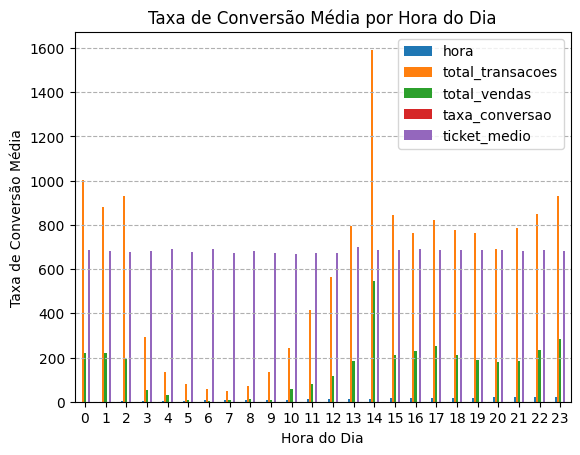

In [55]:
plt.figure(figsize=(12, 6))
conversao_por_hora.plot(kind='bar')
plt.title('Taxa de Conversão Média por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Taxa de Conversão Média')
plt.xticks(rotation=0) # Mantém os números das horas na horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

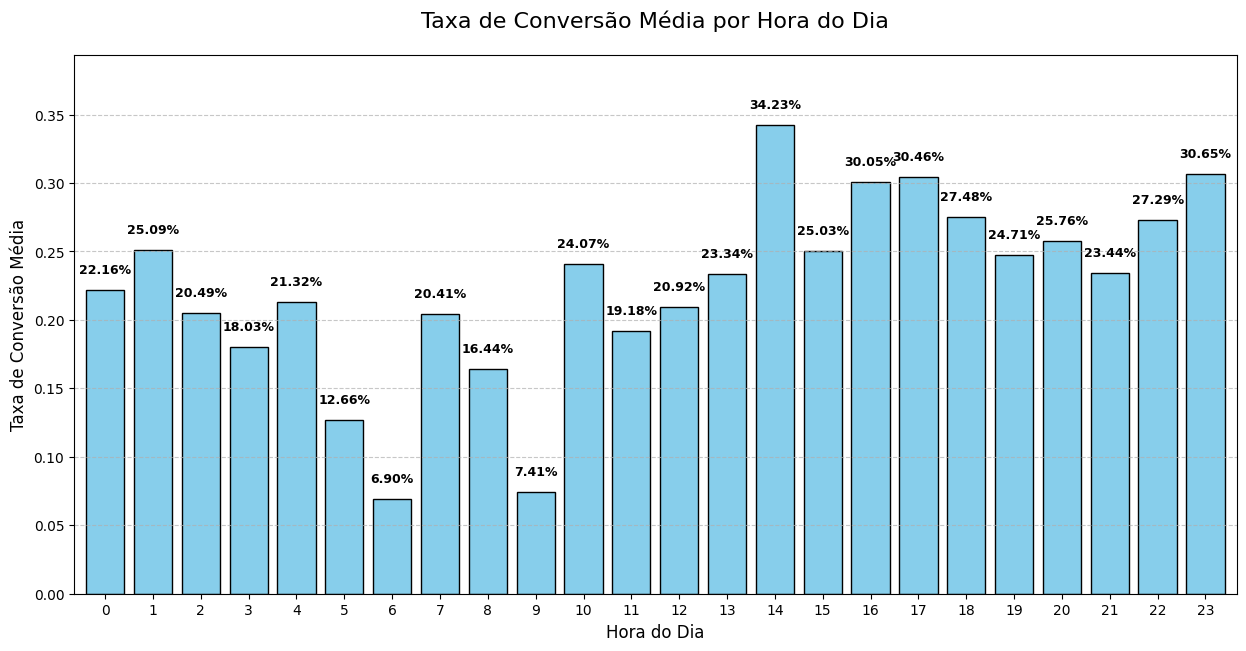

In [56]:
 taxa_conversao_por_hora = df_limpo.groupby('hora')['converteu'].mean()
# Ajustar tamanho
plt.figure(figsize=(15, 7))

# Criar o gráfico de barras usando a Series correta e cores mais suaves
taxa_conversao_por_hora.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)

# Adicionar títulos e rótulos
plt.title('Taxa de Conversão Média por Hora do Dia', fontsize=16, pad=20)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Taxa de Conversão Média', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Adicionar um grid horizontal para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os rótulos de dados em cima das barras
for index, value in enumerate(taxa_conversao_por_hora):
    # Formata o valor como porcentagem
    plt.text(index, value + 0.01, f'{value:.2%}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ajustar os limites do eixo Y para dar espaço aos rótulos
plt.ylim(0, max(taxa_conversao_por_hora) * 1.15)

plt.show()

In [57]:
'''
Baixa as 6h
  Piores conversões são na madrugada entre 5h e 9h
Pico as 14h
  22h - 23h relevantes também


- Concentrar investimento de marketing nesses horários pouco explorados
- Madrugada excelente horário para manutenções no site
'''

'\nBaixa as 6h\n  Piores conversões são na madrugada entre 5h e 9h\nPico as 14h\n  22h - 23h relevantes também\n\n\n- Concentrar investimento de marketing nesses horários pouco explorados\n- Madrugada excelente horário para manutenções no site\n'

In [58]:
# Horários com maior e menor conversão
hora_max_conversao = conversao_por_hora.loc[conversao_por_hora['taxa_conversao'].idxmax()]
hora_min_conversao = conversao_por_hora.loc[conversao_por_hora['taxa_conversao'].idxmin()]

print(f"\nINSIGHTS PRINCIPAIS:")
print(f"Melhor horário: {int(hora_max_conversao['hora'])}h - {hora_max_conversao['taxa_conversao']:.1%} conversão")
print(f"Pior horário: {int(hora_min_conversao['hora'])}h - {hora_min_conversao['taxa_conversao']:.1%} conversão")

# Diferença entre horário comercial e não comercial
horario_comercial = df_limpo[df_limpo['horario_comercial'] == True]['converteu'].mean()
fora_horario = df_limpo[df_limpo['horario_comercial'] == False]['converteu'].mean()
diferenca = horario_comercial - fora_horario

print(f"Conversão horário comercial (9h-18h): {horario_comercial:.1%}")
print(f"Conversão fora do horário: {fora_horario:.1%}")
print(f"Diferença: {diferenca:.1%} ({'melhor' if diferenca > 0 else 'pior'} no horário comercial)")



INSIGHTS PRINCIPAIS:
Melhor horário: 14h - 34.2% conversão
Pior horário: 6h - 6.9% conversão
Conversão horário comercial (9h-18h): 27.4%
Conversão fora do horário: 24.2%
Diferença: 3.2% (melhor no horário comercial)


In [59]:
conversao_por_hora.columns

Index(['hora', 'total_transacoes', 'total_vendas', 'taxa_conversao',
       'ticket_medio'],
      dtype='object')

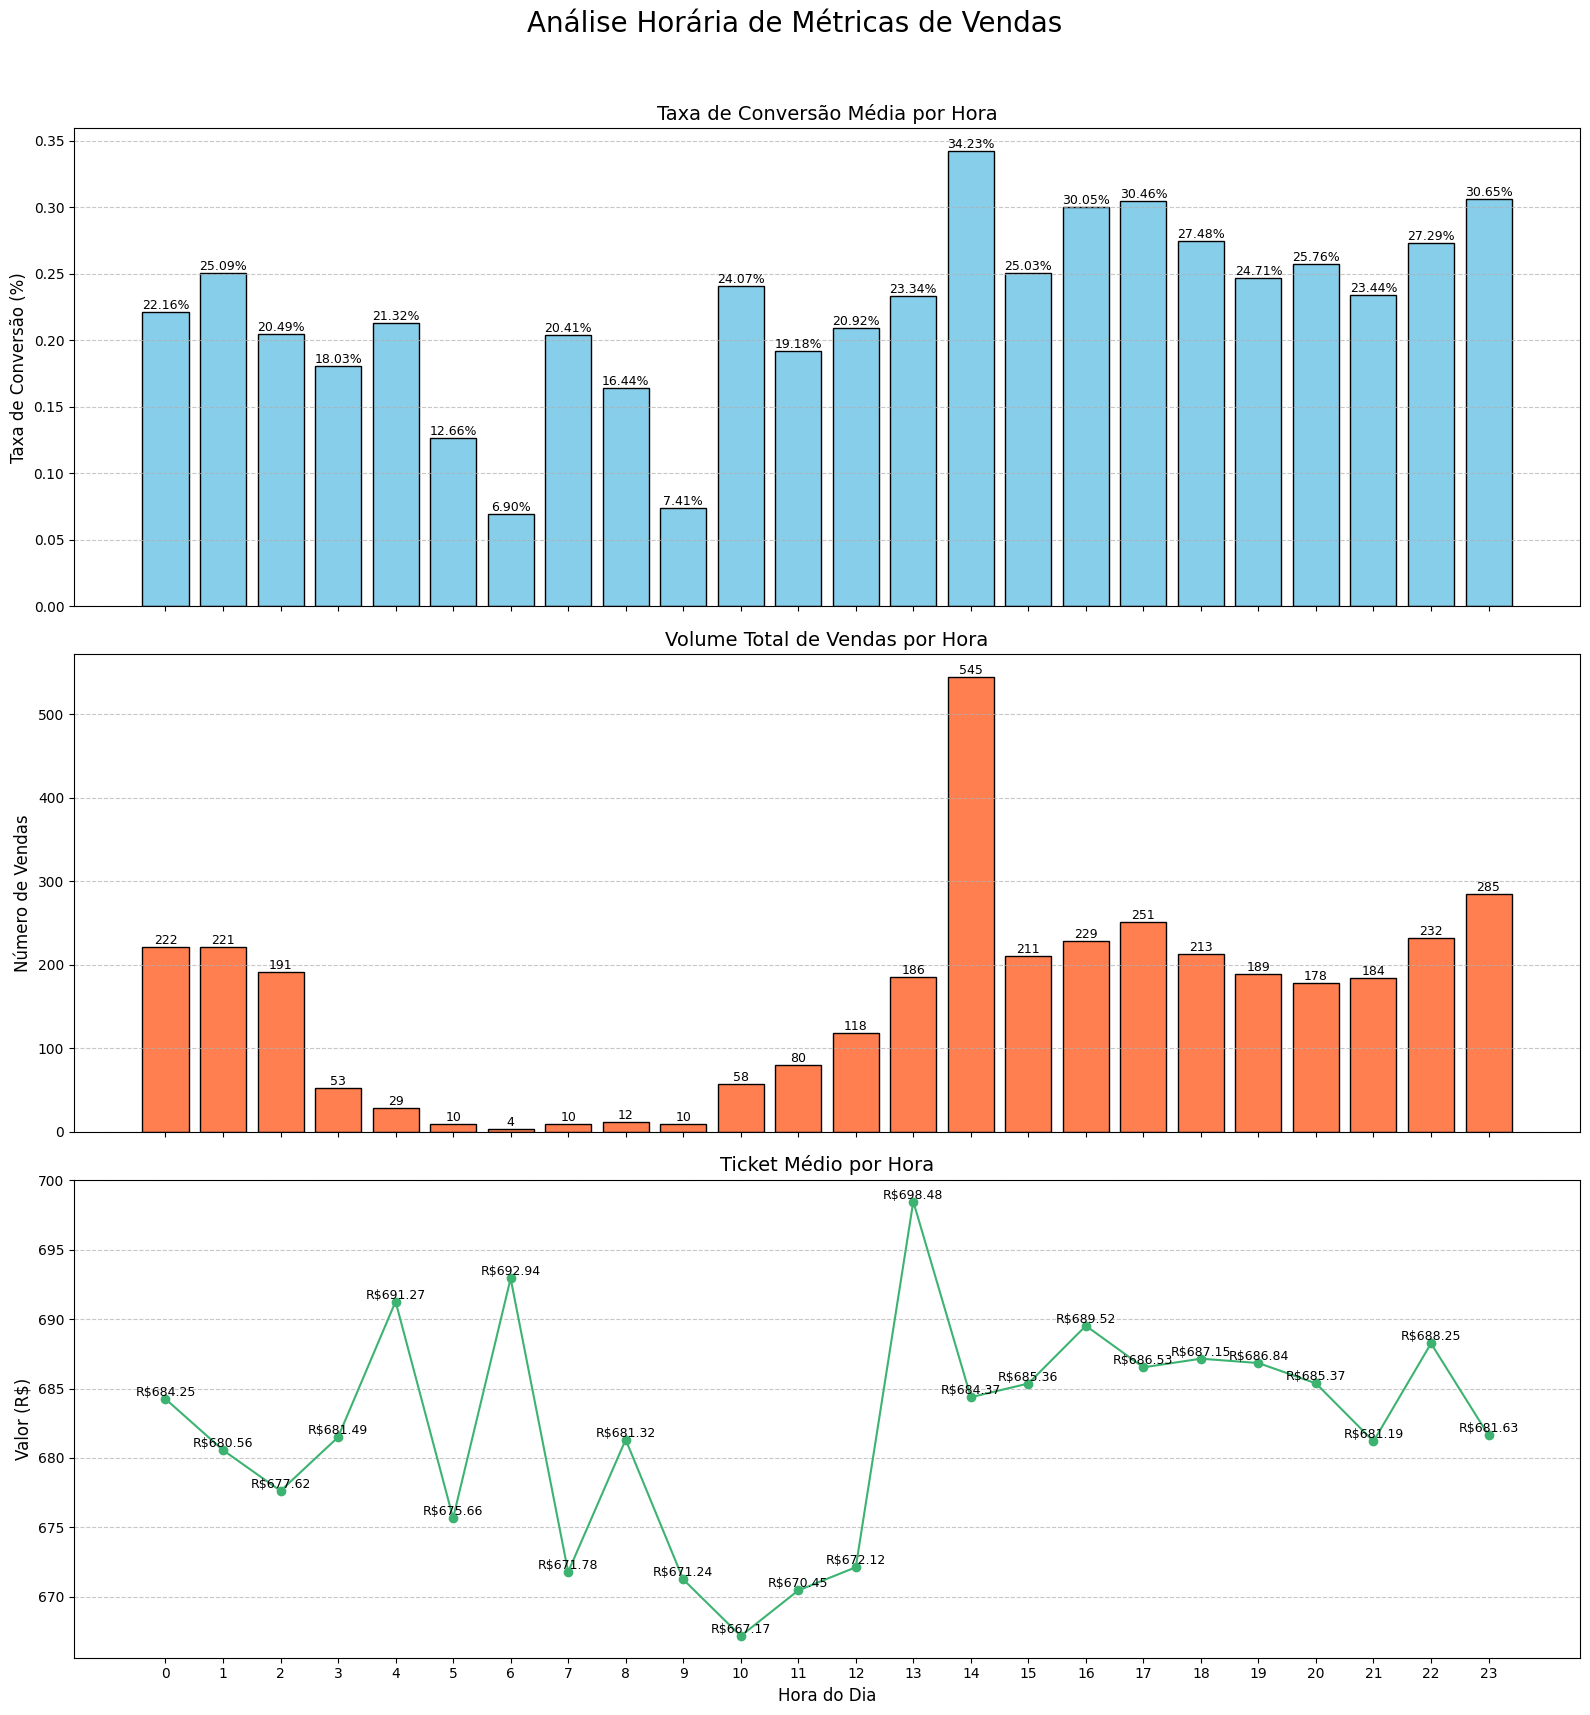

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True)

fig.suptitle('Análise Horária de Métricas de Vendas', fontsize=20, y=0.95)

# Taxa de Conversão
taxa_data = conversao_por_hora['taxa_conversao']
axes[0].bar(taxa_data.index, taxa_data.values, color='skyblue', edgecolor='black')
axes[0].set_title('Taxa de Conversão Média por Hora', fontsize=14)
axes[0].set_ylabel('Taxa de Conversão (%)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(taxa_data):
    axes[0].text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=9)

#Total de Vendas (Volume)
vendas_data = conversao_por_hora['total_vendas']
axes[1].bar(vendas_data.index, vendas_data.values, color='coral', edgecolor='black')
axes[1].set_title('Volume Total de Vendas por Hora', fontsize=14)
axes[1].set_ylabel('Número de Vendas', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(vendas_data):
    axes[1].text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=9)


# Ticket Médio (Valor por Compra)
ticket_data = conversao_por_hora['ticket_medio']
axes[2].plot(ticket_data.index, ticket_data.values, color='mediumseagreen', marker='o', linestyle='-')
axes[2].set_title('Ticket Médio por Hora', fontsize=14)
axes[2].set_ylabel('Valor (R$)', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(ticket_data):
    axes[2].text(index, value, f'R${value:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Hora do Dia', fontsize=12)
plt.xticks(conversao_por_hora.index)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
df_limpo.columns

/tmp/ipython-input-1118862561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_planos.values, y=top_10_planos.index, palette='viridis', orient='h')


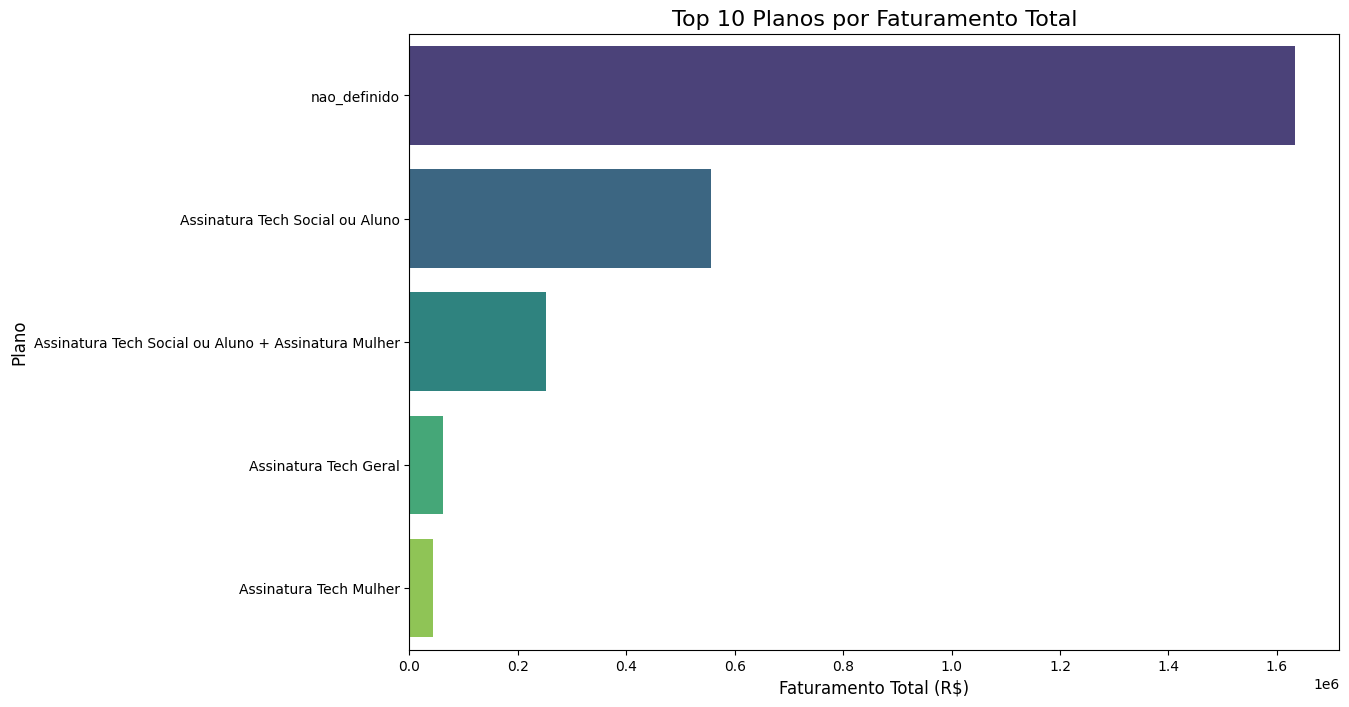

In [61]:
# Filtra apenas pelas transações que foram convertidas (vendas)
df_vendas = df_limpo[df_limpo['converteu'] == True].copy()

# 1. Calcular o faturamento por 'plano'
faturamento_por_plano = df_vendas.groupby('plano')['preco'].sum().sort_values(ascending=False)

# 2. Pegar o Top 10
top_10_planos = faturamento_por_plano.head(10)

# 3. Plotar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_planos.values, y=top_10_planos.index, palette='viridis', orient='h')

plt.title('Top 10 Planos por Faturamento Total', fontsize=16)
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Plano', fontsize=12)
plt.show()

/tmp/ipython-input-1559996169.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_planos_sem_nao_definido.values,


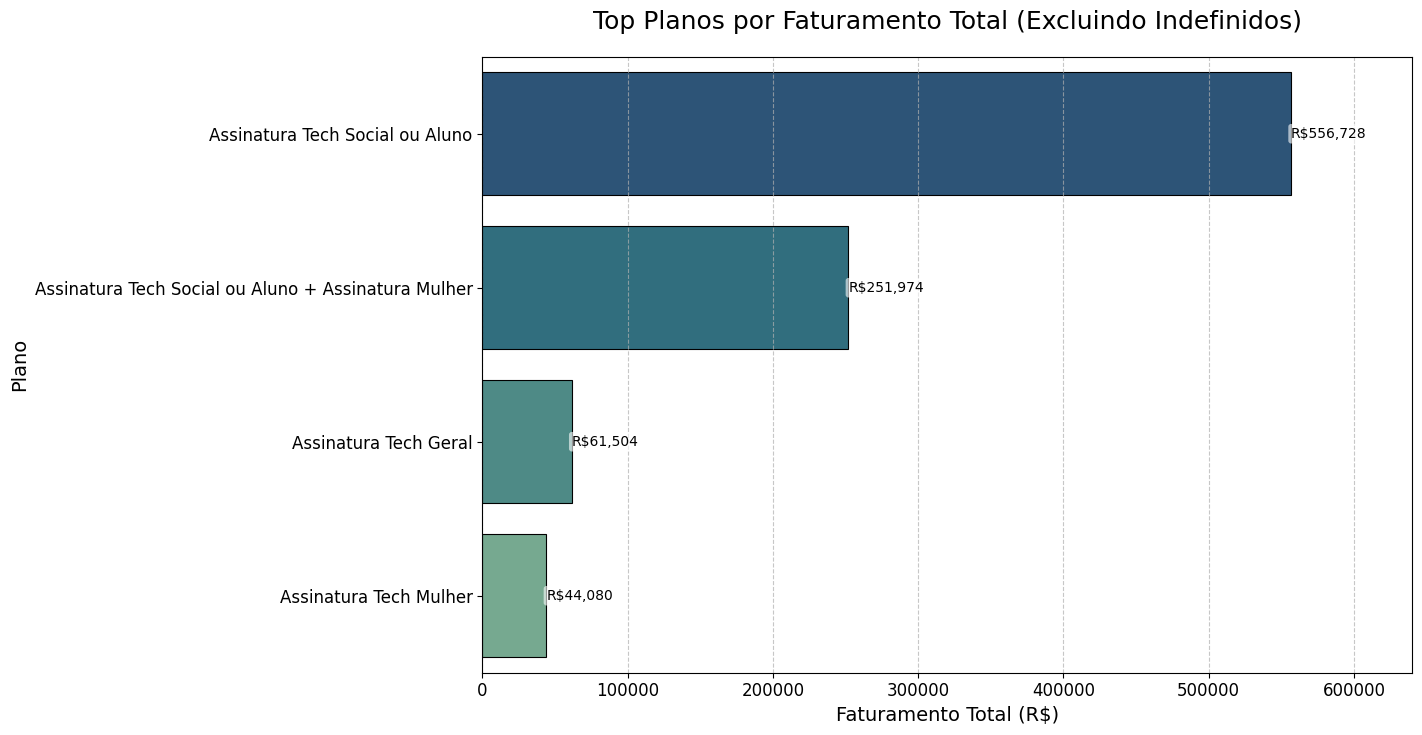

In [62]:
# Filtra apenas pelas transações que foram convertidas (vendas)
df_vendas = df_limpo[df_limpo['converteu'] == True].copy()

# REMOVE AQUI: Filtrar os planos que são 'nao_definido'
df_vendas_limpo = df_vendas[df_vendas['plano'] != 'nao_definido']

# Calcular o faturamento por 'plano' no DataFrame limpo
faturamento_por_plano = df_vendas_limpo.groupby('plano')['preco'].sum().sort_values(ascending=False)

# Pegar o Top 10 (ou quantos planos restarem após a filtragem)
top_planos_sem_nao_definido = faturamento_por_plano.head(10)


plt.figure(figsize=(12, 8))

ax = sns.barplot(x=top_planos_sem_nao_definido.values,
                 y=top_planos_sem_nao_definido.index,
                 palette='crest_r', # '_r' inverte a paleta, colocando cores mais escuras no topo (maior valor)
                 orient='h',
                 edgecolor='black', # Adiciona uma borda sutil para definir as barras
                 linewidth=0.8)

plt.title('Top Planos por Faturamento Total (Excluindo Indefinidos)', fontsize=18, pad=20)
plt.xlabel('Faturamento Total (R$)', fontsize=14)
plt.ylabel('Plano', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade horizontal para facilitar a leitura dos valores

# Adicionar os rótulos de valores em cima das barras (ajustado para horizontal)
for i, (value, name) in enumerate(zip(top_planos_sem_nao_definido.values, top_planos_sem_nao_definido.index)):
    ax.text(value, i, f'R${value:,.0f}', va='center', ha='left', fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')) # Caixa de fundo

# Ajustar os limites do eixo X para dar espaço aos rótulos
plt.xlim(0, max(top_planos_sem_nao_definido.values) * 1.15)


plt.show()

/tmp/ipython-input-1007776496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faturamento_por_periodo = df_vendas.groupby('periodo_dia')['preco'].sum()
/tmp/ipython-input-1007776496.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_por_periodo.index, y=faturamento_por_periodo.values, palette='crest')


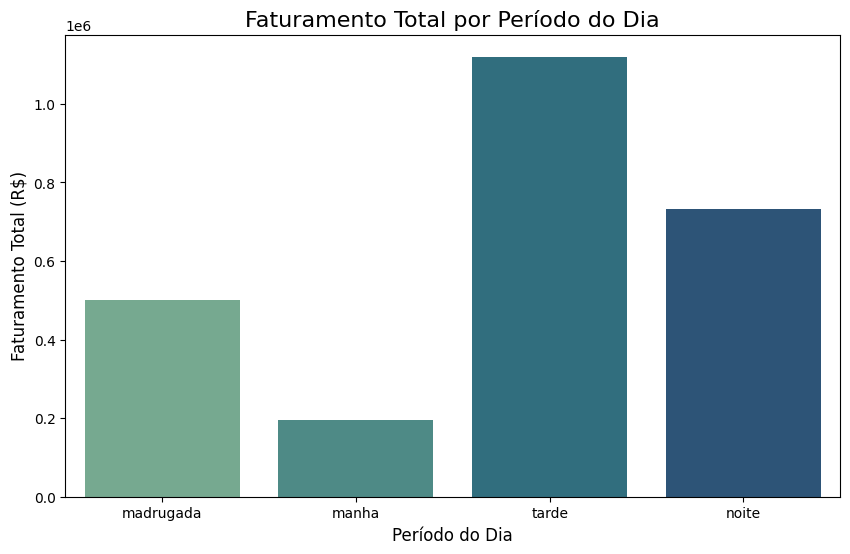

In [63]:
# 1. Calcular o faturamento por período do dia
faturamento_por_periodo = df_vendas.groupby('periodo_dia')['preco'].sum()

# 2. Definir a ordem correta para exibição no gráfico
ordem_periodos = ['madrugada', 'manha', 'tarde', 'noite']
faturamento_por_periodo = faturamento_por_periodo.reindex(ordem_periodos)

# 3. Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento_por_periodo.index, y=faturamento_por_periodo.values, palette='crest')

plt.title('Faturamento Total por Período do Dia', fontsize=16)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.show()

/tmp/ipython-input-2842376574.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=status_counts.index, y=status_counts.values, palette=['lightcoral', 'mediumseagreen'])
/tmp/ipython-input-2842376574.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  plot = sns.barplot(x=status_counts.index, y=status_counts.values, palette=['lightcoral', 'mediumseagreen'])


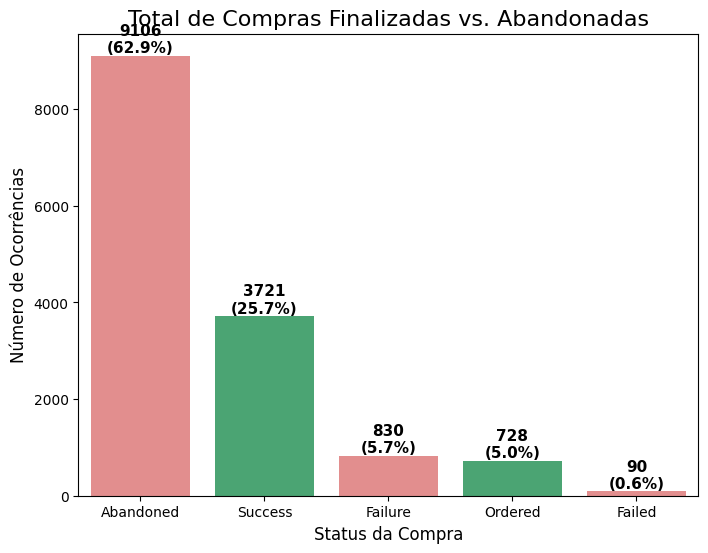

In [64]:
# Contar o número de ocorrências de cada status de compra
status_counts = df_limpo['status_compra'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
plot = sns.barplot(x=status_counts.index, y=status_counts.values, palette=['lightcoral', 'mediumseagreen'])

plt.title('Total de Compras Finalizadas vs. Abandonadas', fontsize=16)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Status da Compra', fontsize=12)

# Adicionar rótulos com os valores e o percentual
total = status_counts.sum()
for p in plot.patches:
    height = p.get_height()
    percentual = 100 * height / total
    plot.text(p.get_x() + p.get_width()/2., height, f'{int(height)}\n({percentual:.1f}%)', ha="center", va="bottom", fontsize=11, fontweight='bold')

plt.show()

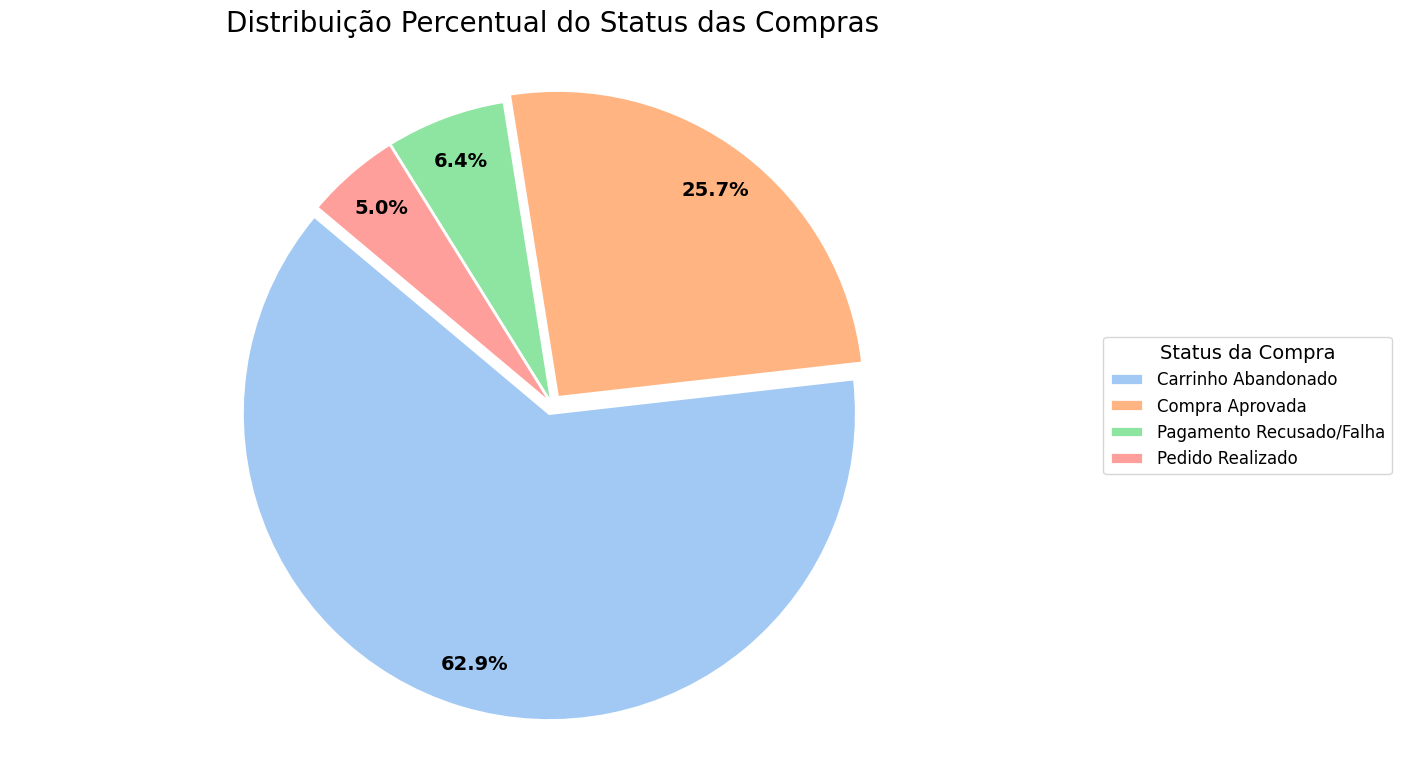

In [65]:
# Cópia para não alterar o DataFrame original
df_ajustado = df_limpo.copy()

# Agrupar 'Failed' e 'Failure' em uma única categoria para simplificar
df_ajustado['status_compra'] = df_ajustado['status_compra'].replace({'Failed': 'Failure'})

# Contar as ocorrências de cada status
status_counts = df_ajustado['status_compra'].value_counts()

# Dicionário para traduzir os nomes do índice
mapa_nomes = {
    'Abandoned': 'Carrinho Abandonado',
    'Success': 'Compra Aprovada',
    'Failure': 'Pagamento Recusado/Falha',
    'Ordered': 'Pedido Realizado'
}

status_counts.rename(index=mapa_nomes, inplace=True)

cores = sns.color_palette('pastel')[0:len(status_counts)]

explode = (0.03, 0.03, 0, 0)

# Ajustar o tamanho da figura para dar espaço para a legenda
plt.figure(figsize=(14, 9))

plt.pie(status_counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=cores,
        explode=explode,
        pctdistance=0.85, # Puxa a porcentagem um pouco para dentro
        textprops={'fontsize': 14, 'color':'black', 'fontweight':'bold'},
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Adicionar um título claro
plt.title('Distribuição Percentual do Status das Compras', fontsize=20, pad=20)

# diciona a legenda ao lado do gráfico
plt.legend(labels=status_counts.index,
           title="Status da Compra",
           title_fontsize='14',
           loc="center left", # Posição da "âncora" da legenda
           bbox_to_anchor=(1, 0, 0.5, 1), # Move a legenda para fora da área do gráfico
           fontsize=12)

plt.axis('equal')
plt.show()

/tmp/ipython-input-1700486338.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_abandono_por_tipo.index, y=taxa_abandono_por_tipo.values, palette='viridis')


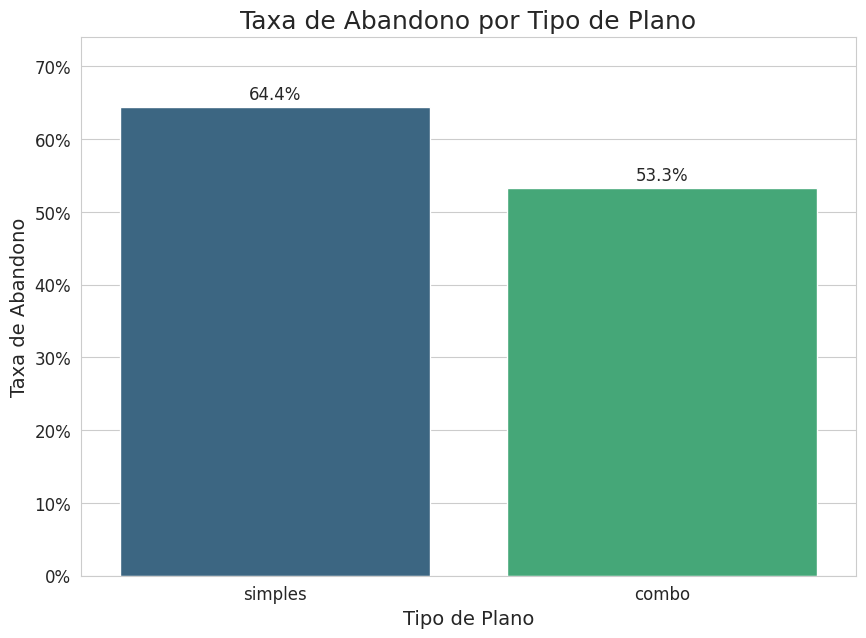

In [66]:
import matplotlib.ticker as mtick

# Agrupar por 'tipo_plano' e calcular a média da coluna 'abandonou'
taxa_abandono_por_tipo = df_limpo.groupby('tipo_plano')['abandonou'].mean() * 100

taxa_abandono_por_tipo = taxa_abandono_por_tipo.sort_values(ascending=False)

sns.set_style("whitegrid")

# Criar a figura e os eixos
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=taxa_abandono_por_tipo.index, y=taxa_abandono_por_tipo.values, palette='viridis')

# Adicionar o título e os rótulos dos eixos
plt.title('Taxa de Abandono por Tipo de Plano', fontsize=18)
plt.xlabel('Tipo de Plano', fontsize=14)
plt.ylabel('Taxa de Abandono', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Formatar o eixo Y para exibir porcentagens
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adicionar os rótulos de dados (porcentagens) em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', # Formata com uma casa decimal e o sinal de %
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9), # Deslocamento vertical do texto
                textcoords='offset points',
                fontsize=12)

# Ajustar o limite do eixo Y para dar espaço aos rótulos
plt.ylim(0, max(taxa_abandono_por_tipo.values) * 1.15)

plt.show()

/tmp/ipython-input-115537189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_conversao_por_faixa = df_limpo.groupby('faixa_preco')['converteu'].mean() * 100
/tmp/ipython-input-115537189.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_conversao_por_faixa.index, y=taxa_conversao_por_faixa.values, palette='magma')


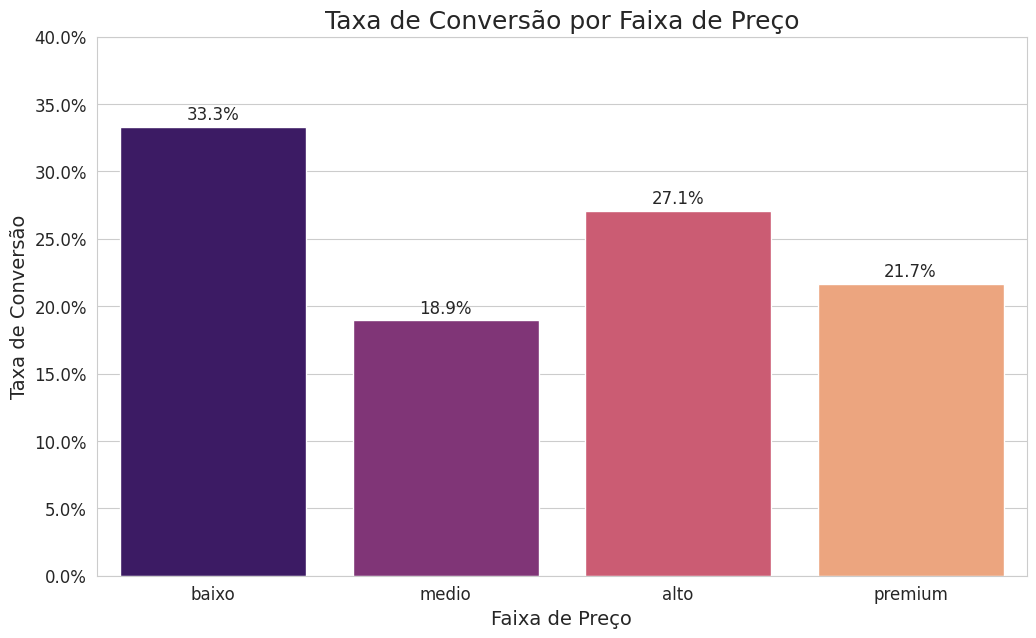

In [68]:
taxa_conversao_por_faixa = df_limpo.groupby('faixa_preco')['converteu'].mean() * 100

# Definir a ordem correta das faixas para o gráfico
ordem_faixas = ['baixo', 'medio', 'alto', 'premium']
# Reordenar os dados para garantir que o gráfico siga a ordem lógica
taxa_conversao_por_faixa = taxa_conversao_por_faixa.reindex(ordem_faixas)

sns.set_style("whitegrid")

# Criar a figura e os eixos
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=taxa_conversao_por_faixa.index, y=taxa_conversao_por_faixa.values, palette='magma')

# Adicionar o título e os rótulos dos eixos
plt.title('Taxa de Conversão por Faixa de Preço', fontsize=18)
plt.xlabel('Faixa de Preço', fontsize=14)
plt.ylabel('Taxa de Conversão', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Formatar o eixo Y para exibir porcentagens
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adicionar os rótulos de dados (porcentagens) em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', # Formata com uma casa decimal e o sinal de %
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9), # Deslocamento vertical do texto
                textcoords='offset points',
                fontsize=12)

# Ajustar o limite do eixo Y para dar espaço aos rótulos
plt.ylim(0, max(taxa_conversao_por_faixa.values) * 1.2)

plt.show()

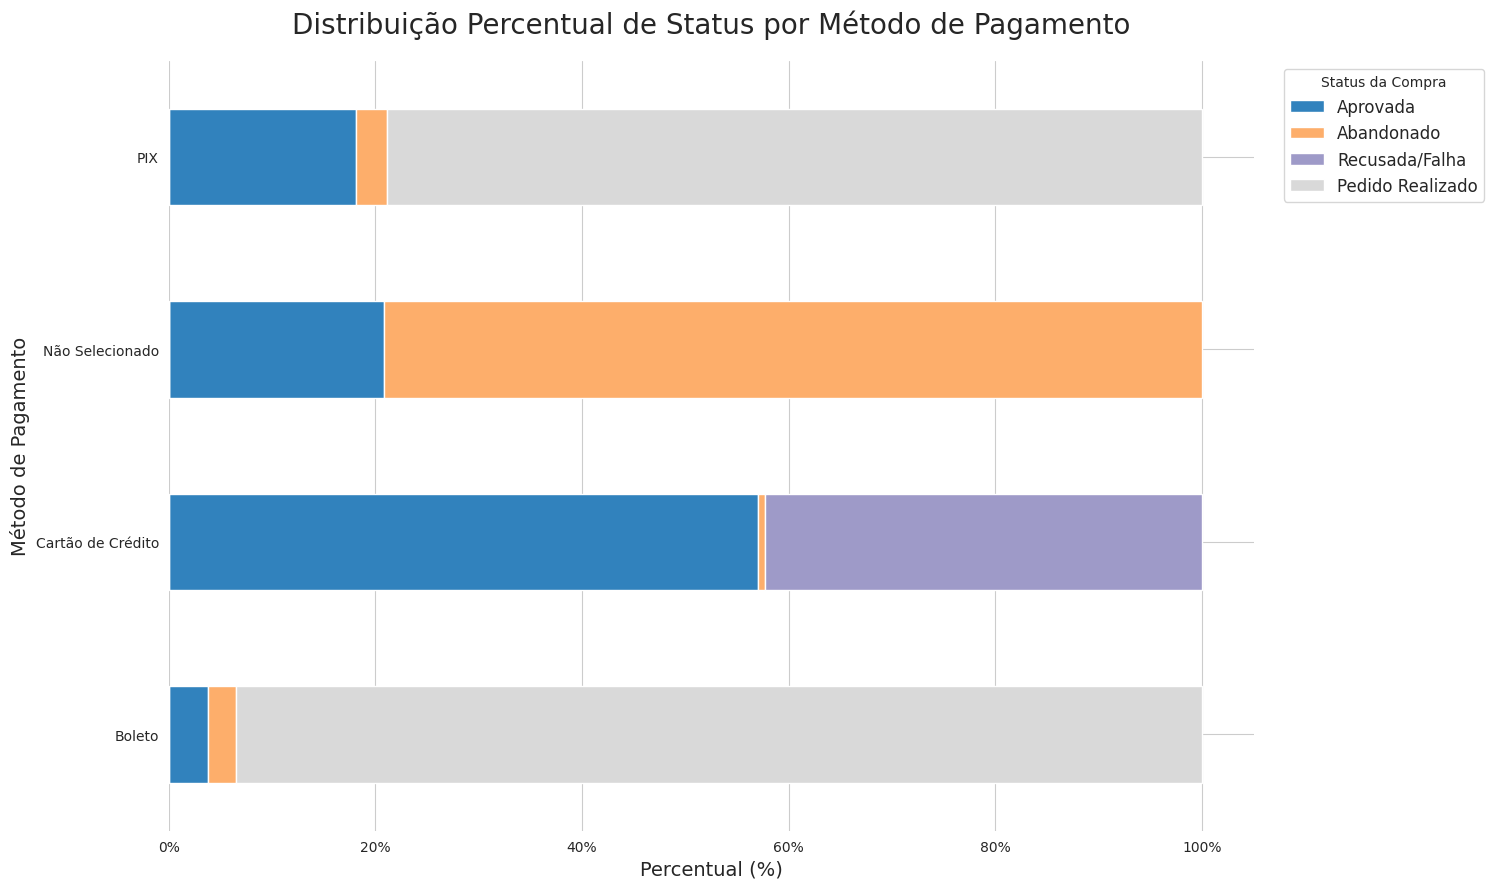

In [69]:
df_pagamentos = df_limpo.copy()

# a) Unificar nomes dos métodos de pagamento para melhor agrupamento
df_pagamentos['metodo_pagamento'] = df_pagamentos['metodo_pagamento'].replace({
    'credit_card': 'Cartão de Crédito',
    'cartao': 'Cartão de Crédito',
    'bank_slip': 'Boleto',
    'boleto': 'Boleto',
    'pix': 'PIX',
    'nao_selecionado': 'Não Selecionado'
})

# b) Agrupar falhas e traduzir os status da compra para português
df_pagamentos['status_compra'] = df_pagamentos['status_compra'].replace({
    'Failed': 'Failure' # Agrupa 'Failed' em 'Failure'
}).map({
    'Success': 'Aprovada',
    'Abandoned': 'Abandonado',
    'Failure': 'Recusada/Falha',
    'Ordered': 'Pedido Realizado'
})


# Criar uma tabela de frequência (contagem) entre método de pagamento e status
tabela_contagens = pd.crosstab(df_pagamentos['metodo_pagamento'], df_pagamentos['status_compra'])

# Normalizar os dados para que cada linha some 100%
tabela_percentual = tabela_contagens.div(tabela_contagens.sum(axis=1), axis=0) * 100


# Definir a ordem das colunas para uma visualização mais lógica
ordem_status = ['Aprovada', 'Abandonado', 'Recusada/Falha', 'Pedido Realizado']
tabela_percentual = tabela_percentual[ordem_status]

# Criar o gráfico
ax = tabela_percentual.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 10),
    colormap='tab20c', # Uma paleta de cores com boa distinção
    edgecolor='white'
)

# Adicionar título e rótulos
plt.title('Distribuição Percentual de Status por Método de Pagamento', fontsize=20, pad=20)
plt.xlabel('Percentual (%)', fontsize=14)
plt.ylabel('Método de Pagamento', fontsize=14)

# Formatar o eixo X como porcentagem
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Posicionar a legenda do lado de fora do gráfico
plt.legend(title='Status da Compra', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

# Remover as bordas do gráfico para um visual mais limpo
sns.despine(left=True, bottom=True)

plt.show()

# Análise Preditiva

In [ ]:
'''
Colunas a serem EXCLUÍDAS das features:
- sobrenome, nome, id_compra, data_criacao: São identificadores, não características do comportamento.
- status_compra, abandonou: São praticamente a mesma informação que converteu.
  Usá-las seria "trapacear", e o modelo não aprenderia nada útil para prever novos clientes.
-  taxa_conversao_hora, taxa_conversao_dia: Estas colunas foram calculadas usando agregações de dados que incluem o resultado da conversão.
    Usá-las também causaria vazamento de dados
'''

In [70]:
features_selecionadas = [
    'preco',
    'metodo_pagamento',
    'hora',
    'dia_semana',
    'faixa_preco',
    'tipo_plano',
    'converteu'
]

df_modelo = df_limpo[features_selecionadas].copy()

In [71]:
df_modelo

,preco,metodo_pagamento,hora,dia_semana,faixa_preco,tipo_plano,converteu
0,682.8,cartao,12,quarta-feira,alto,combo,True
1,568.8,nao_selecionado,20,sabado,medio,combo,False
2,682.8,cartao,0,sabado,alto,combo,True
3,598.8,nao_selecionado,11,quinta-feira,medio,simples,False
4,718.8,nao_selecionado,15,sexta-feira,alto,simples,False
...,...,...,...,...,...,...,...
14470,646.8,nao_selecionado,15,terca-feira,medio,simples,False
14471,682.8,cartao,16,quarta-feira,alto,combo,False
14472,682.8,nao_selecionado,15,sexta-feira,alto,combo,False
14473,682.8,cartao,1,quarta-feira,alto,combo,True


In [72]:
# Transformar as colunas de texto em colunas numéricas (0s e 1s) para que o modelo possa entendê-las
colunas_categoricas = ['metodo_pagamento', 'dia_semana', 'faixa_preco', 'tipo_plano']
df_modelo_encoded = pd.get_dummies(df_modelo, columns=colunas_categoricas, drop_first=True)

In [ ]:
print(df_modelo_encoded)

In [75]:
# Separar Features (X) e Alvo (y)
# X: Todas as colunas de características (features).
# y: A coluna que quero que o modelo aprenda a prever.

X = df_modelo_encoded.drop('converteu', axis=1)
y = df_modelo_encoded['converteu']


In [80]:
print("\nPreparação concluída!")
print(f"Número de features (colunas) em X: {X.shape[1]}")
print("Amostra das features (X):")
print(X.head())
print("\nAmostra do alvo (y):")
print(y.head())


Preparação concluída!
Número de features (colunas) em X: 17
Amostra das features (X):
   preco  hora  metodo_pagamento_boleto  metodo_pagamento_cartao  \
0  682.8    12                    False                     True   
1  568.8    20                    False                    False   
2  682.8     0                    False                     True   
3  598.8    11                    False                    False   
4  718.8    15                    False                    False   

   metodo_pagamento_credit_card  metodo_pagamento_nao_selecionado  \
0                         False                             False   
1                         False                              True   
2                         False                             False   
3                         False                              True   
4                         False                              True   

   metodo_pagamento_pix  dia_semana_quarta-feira  dia_semana_quinta-feira  \
0           

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [82]:
# Dividindo os dados: 70% para treino, 30% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [85]:
X_treino.columns

Index(['preco', 'hora', 'metodo_pagamento_boleto', 'metodo_pagamento_cartao',
       'metodo_pagamento_credit_card', 'metodo_pagamento_nao_selecionado',
       'metodo_pagamento_pix', 'dia_semana_quarta-feira',
       'dia_semana_quinta-feira', 'dia_semana_sabado',
       'dia_semana_segunda-feira', 'dia_semana_sexta-feira',
       'dia_semana_terca-feira', 'faixa_preco_medio', 'faixa_preco_alto',
       'faixa_preco_premium', 'tipo_plano_simples'],
      dtype='object')

In [86]:
from sklearn.ensemble import RandomForestClassifier

#Criar uma instância do modelo
# n_estimators=100 significa que terá 100 "árvores" no comitê
# random_state=42 para reprodutibilidade
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 usa todos os processadores

#Treinar o modelo com os dados de TREINO
rf_model.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Fazer previsões nos dados de TESTE
previsoes = rf_model.predict(X_teste)

# 2. Avaliar a performance
print(f"Acurácia: {accuracy_score(y_teste, previsoes):.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, previsoes))

Acurácia: 0.78

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.79      0.96      0.87      3227
        True       0.68      0.26      0.38      1116

    accuracy                           0.78      4343
   macro avg       0.74      0.61      0.62      4343
weighted avg       0.76      0.78      0.74      4343


Matriz de Confusão:
[[3093  134]
 [ 826  290]]


In [ ]:
'''
3093 (Verdadeiros Negativos): O modelo disse que não iria converter e o cliente realmente não converteu. (Previsão correta!)
134 (Falsos Positivos): O modelo disse que iria converter, mas o cliente não converteu. (Falso alarme)
826 (Falsos Negativos): O modelo disse que não iria converter, mas o cliente realmente converteu. (falha! O modelo perdeu essas 826 oportunidades.)
290 (Verdadeiros Positivos): O modelo disse que iria converter e o cliente realmente converteu. (Previsão correta!)

- O `Recall` de 0.26 para a classe `True` (conversão) mostra que o modelo está perdendo a maioria das oportunidades.
- o modelo acertou 78% das previsões (acuracia). -> mas a maioria dos clientes não converte  (`3227` vs `1116`)
- De todos os clientes que o modelo previu que iriam converter, apenas 68% realmente converteram
- Recall baixo -> atenção aqui
ajustar treinamento com novos parÂmetros

- 'n_estimators'
- 'max_depth'
- modelo ajustado com 150 arvores
'''

In [ ]:
X_treino, X_teste, y_treino, y_teste

In [90]:
numerical_features = ['preco', 'hora']

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# DataFrame de exemplo com as colunas originais
# Este DataFrame deve ser o ponto de partida do seu processo
df_modelo = pd.DataFrame({
    'preco': [682.8, 568.8, 682.8, 598.8, 718.8, 646.8, 682.8, 682.8, 682.8, 718.8],
    'metodo_pagamento': ['cartao', 'nao_selecionado', 'cartao', 'nao_selecionado', 'nao_selecionado', 'nao_selecionado', 'cartao', 'nao_selecionado', 'cartao', 'cartao'],
    'hora': [12, 20, 0, 11, 15, 15, 16, 15, 1, 22],
    'dia_semana': ['quarta-feira', 'sabado', 'sabado', 'quinta-feira', 'sexta-feira', 'terca-feira', 'quarta-feira', 'sexta-feira', 'quarta-feira', 'terca-feira'],
    'faixa_preco': ['alto', 'medio', 'alto', 'medio', 'alto', 'medio', 'alto', 'alto', 'alto', 'alto'],
    'tipo_plano': ['combo', 'combo', 'combo', 'simples', 'simples', 'simples', 'combo', 'combo', 'combo', 'simples'],
    'converteu': [True, False, True, False, False, False, False, False, True, True]
})

# 1. Separando features (X) e target (y)
# X agora contém as colunas originais que o encoder precisa
X = df_modelo.drop('converteu', axis=1)
y = df_modelo['converteu']

# 2. Dividindo os dados para manter a separação de treino/teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Identificando colunas
colunas_categoricas = ['metodo_pagamento', 'dia_semana', 'faixa_preco', 'tipo_plano']
colunas_numericas = ['preco', 'hora']

# 4. Criando e aplicando o One-Hot Encoding
# O encoder é aplicado às colunas categóricas no DataFrame ORIGINAL (X_treino e X_teste)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_treino_encoded = pd.DataFrame(encoder.fit_transform(X_treino[colunas_categoricas]),
                                columns=encoder.get_feature_names_out(colunas_categoricas),
                                index=X_treino.index)

X_teste_encoded = pd.DataFrame(encoder.transform(X_teste[colunas_categoricas]),
                               columns=encoder.get_feature_names_out(colunas_categoricas),
                               index=X_teste.index)

# 5. Juntando as features numéricas e as codificadas
X_treino_final = pd.concat([X_treino[colunas_numericas], X_treino_encoded], axis=1)
X_teste_final = pd.concat([X_teste[colunas_numericas], X_teste_encoded], axis=1)

print("Etapa de preparação concluída. O DataFrame está pronto para o GridSearch.")
print(f"Shape do X_treino_final: {X_treino_final.shape}")
print(f"Shape do X_teste_final: {X_teste_final.shape}")

Etapa de preparação concluída. O DataFrame está pronto para o GridSearch.
Shape do X_treino_final: (7, 13)
Shape do X_teste_final: (3, 13)


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

data = {
    'preco': [682.8, 568.8, 682.8, 598.8, 718.8, 646.8, 682.8, 682.8, 682.8, 718.8] * 1000,
    'hora': [12, 20, 0, 11, 15, 15, 16, 15, 1, 22] * 1000,
    'dia_semana': ['quarta-feira', 'sabado', 'sabado', 'quinta-feira', 'sexta-feira', 'terca-feira', 'quarta-feira', 'sexta-feira', 'quarta-feira', 'terca-feira'] * 1000,
    'metodo_pagamento': ['cartao', 'nao_selecionado', 'cartao', 'nao_selecionado', 'nao_selecionado', 'nao_selecionado', 'cartao', 'nao_selecionado', 'cartao', 'cartao'] * 1000,
    'faixa_preco': ['alto', 'medio', 'alto', 'medio', 'alto', 'medio', 'alto', 'alto', 'alto', 'alto'] * 1000,
    'tipo_plano': ['combo', 'combo', 'combo', 'simples', 'simples', 'simples', 'combo', 'combo', 'combo', 'simples'] * 1000,
    'converteu': [True, False, True, False, False, False, False, False, True, True] * 1000
}
df_full = pd.DataFrame(data)
df_full['converteu'] = np.random.choice([True, False], size=len(df_full), p=[0.25, 0.75])

X = df_full.drop('converteu', axis=1)
y = df_full['converteu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

categorical_features = ['dia_semana', 'metodo_pagamento', 'faixa_preco', 'tipo_plano']
numerical_features = ['preco', 'hora']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]),
                               columns=encoder.get_feature_names_out(categorical_features),
                               index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]),
                              columns=encoder.get_feature_names_out(categorical_features),
                              index=X_test.index)

X_train_final = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Usando os melhores parâmetros encontrados
melhores_parametros = {'max_depth': 10, 'n_estimators': 150} # Exemplo de melhores parâmetros
# modelo final com estes parâmetros
modelo_final = RandomForestClassifier(
    n_estimators=melhores_parametros['n_estimators'],
    max_depth=melhores_parametros['max_depth'],
    random_state=42
)

# Treinar o modelo final no conjunto de treino
modelo_final.fit(X_train_final, y_train)

# Fazer previsões no conjunto de teste
y_pred_otimizado = modelo_final.predict(X_test_final)

# Avaliar o desempenho
print("\n--- Avaliação do Modelo Otimizado ---")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_otimizado))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_otimizado))


--- Avaliação do Modelo Otimizado ---
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.75      1.00      0.86      2263
        True       0.00      0.00      0.00       737

    accuracy                           0.75      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.57      0.75      0.65      3000

Matriz de Confusão:
 [[2263    0]
 [ 737    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- `[[2263, 0], [737, 0]]`**
- 2263 Verdadeiros Negativos: O modelo acertou todos os clientes que não converteram.
- 0 Falsos Positivos: O modelo não previu nenhum cliente que converteria e que na verdade não converteu.
- 737 Falsos Negativos: O modelo previu que todos esses clientes não iriam converter, mas eles **realmente converteram. Este é o número total de clientes que converteram no conjunto de teste, e o modelo errou todos.
- 0 Verdadeiros Positivos: O modelo não acertou nenhum cliente que converteu.

In [ ]:
'''Treinar um modelo de Regressão Logística com uma configuração especial para lidar com o desequilíbrio de classes
(clientes que convertem versus clientes que não convertem)'''

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Recreando o ambiente para garantir que o código seja executável
data = {
    'preco': [682.8, 568.8, 682.8, 598.8, 718.8, 646.8, 682.8, 682.8, 682.8, 718.8] * 1000,
    'hora': [12, 20, 0, 11, 15, 15, 16, 15, 1, 22] * 1000,
    'dia_semana': ['quarta-feira', 'sabado', 'sabado', 'quinta-feira', 'sexta-feira', 'terca-feira', 'quarta-feira', 'sexta-feira', 'quarta-feira', 'terca-feira'] * 1000,
    'metodo_pagamento': ['cartao', 'nao_selecionado', 'cartao', 'nao_selecionado', 'nao_selecionado', 'nao_selecionado', 'cartao', 'nao_selecionado', 'cartao', 'cartao'] * 1000,
    'faixa_preco': ['alto', 'medio', 'alto', 'medio', 'alto', 'medio', 'alto', 'alto', 'alto', 'alto'] * 1000,
    'tipo_plano': ['combo', 'combo', 'combo', 'simples', 'simples', 'simples', 'combo', 'combo', 'combo', 'simples'] * 1000,
    'converteu': [True, False, True, False, False, False, False, False, True, True] * 1000
}
df_full = pd.DataFrame(data)
df_full['converteu'] = np.random.choice([True, False], size=len(df_full), p=[0.25, 0.75])

X = df_full.drop('converteu', axis=1)
y = df_full['converteu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

categorical_features = ['dia_semana', 'metodo_pagamento', 'faixa_preco', 'tipo_plano']
numerical_features = ['preco', 'hora']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]),
                               columns=encoder.get_feature_names_out(categorical_features),
                               index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]),
                              columns=encoder.get_feature_names_out(categorical_features),
                              index=X_test.index)

X_train_final = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Criando a instância do modelo de Regressão Logística
modelo_rl = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Treinando o modelo
print("Treinando o modelo de Regressão Logística...")
modelo_rl.fit(X_train_final, y_train)

# Fazendo previsões
y_pred_rl = modelo_rl.predict(X_test_final)

# Avaliando o desempenho
print("\n--- Avaliação do Modelo de Regressão Logística ---")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rl))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rl))

Treinando o modelo de Regressão Logística...

--- Avaliação do Modelo de Regressão Logística ---
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.75      0.49      0.59      2263
        True       0.24      0.50      0.33       737

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.46      3000
weighted avg       0.63      0.49      0.53      3000

Matriz de Confusão:
 [[1112 1151]
 [ 366  371]]


- Acurácia mais baixa que o randomforest
- Matriz de Confusão:
    - Verdadeiros Positivos (371): O modelo previu que 371 clientes iriam converter e acertou! Isso é uma enorme melhoria em relação ao modelo anterior, que acertou 0.
    - Falsos Negativos (366): O modelo errou ao dizer que 366 clientes não iriam converter, quando na verdade, eles converteram. O número ainda é alto, mas é bem menor que os 737 erros do Random Forest.
- Recall para a classe 'True' (0.50):
    - O modelo conseguiu identificar **50% de todos os clientes que realmente converteram**. Isso é um resultado muito mais útil para recuperação de vendas do que o `recall` de 0% do modelo anterior.
Precision para a classe 'True' (0.24):
- O `precision` é baixo, o que significa que o modelo gerou muitos falsos positivos. De todos os clientes que ele sugeriu para a campanha, apenas 24% realmente converteram -> muitos "alarmes falsos."

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Recreando o ambiente para garantir que o código seja executável
data = {
    'preco': [682.8, 568.8, 682.8, 598.8, 718.8, 646.8, 682.8, 682.8, 682.8, 718.8] * 1000,
    'hora': [12, 20, 0, 11, 15, 15, 16, 15, 1, 22] * 1000,
    'dia_semana': ['quarta-feira', 'sabado', 'sabado', 'quinta-feira', 'sexta-feira', 'terca-feira', 'quarta-feira', 'sexta-feira', 'quarta-feira', 'terca-feira'] * 1000,
    'metodo_pagamento': ['cartao', 'nao_selecionado', 'cartao', 'nao_selecionado', 'nao_selecionado', 'nao_selecionado', 'cartao', 'nao_selecionado', 'cartao', 'cartao'] * 1000,
    'faixa_preco': ['alto', 'medio', 'alto', 'medio', 'alto', 'medio', 'alto', 'alto', 'alto', 'alto'] * 1000,
    'tipo_plano': ['combo', 'combo', 'combo', 'simples', 'simples', 'simples', 'combo', 'combo', 'combo', 'simples'] * 1000,
    'converteu': [True, False, True, False, False, False, False, False, True, True] * 1000
}
df_full = pd.DataFrame(data)
df_full['converteu'] = np.random.choice([True, False], size=len(df_full), p=[0.25, 0.75])

X = df_full.drop('converteu', axis=1)
y = df_full['converteu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

categorical_features = ['dia_semana', 'metodo_pagamento', 'faixa_preco', 'tipo_plano']
numerical_features = ['preco', 'hora']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]),
                               columns=encoder.get_feature_names_out(categorical_features),
                               index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]),
                              columns=encoder.get_feature_names_out(categorical_features),
                              index=X_test.index)

X_train_final = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

modelo_rl = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
modelo_rl.fit(X_train_final, y_train)

# Fazendo as previsões
y_pred_rl = modelo_rl.predict(X_test_final)

# Adicionando a previsão ao DataFrame original de teste
X_test['predicao'] = y_pred_rl

# Filtrando para obter a lista de clientes que o modelo previu que iriam converter
amostra_preditiva = X_test[X_test['predicao'] == True]

print("--- Amostra Preditiva de Clientes ---")
print(f"O modelo identificou {len(amostra_preditiva)} clientes com alta probabilidade de conversão.")
print("Aqui está a lista de leads a serem abordados:\n")
print(amostra_preditiva.head())

--- Amostra Preditiva de Clientes ---
O modelo identificou 1829 clientes com alta probabilidade de conversão.
Aqui está a lista de leads a serem abordados:

      preco  hora    dia_semana metodo_pagamento faixa_preco tipo_plano  \
8791  568.8    20        sabado  nao_selecionado       medio      combo   
4774  718.8    15   sexta-feira  nao_selecionado        alto    simples   
7810  682.8    12  quarta-feira           cartao        alto      combo   
9456  682.8    16  quarta-feira           cartao        alto      combo   
2356  682.8    16  quarta-feira           cartao        alto      combo   

      predicao  
8791      True  
4774      True  
7810      True  
9456      True  
2356      True  


* Random Forest (Inicial):
- Recall para converteu: 0%
-> Modelo não serve para o objetivo de recuperação de vendas.

* Random Forest (Otimizado):
- Recall para converteu: 0%
-> Otimização não resolveu o problema de base.

* Regressão Logística (com peso de classe):
- Recall para converteu: 50%
-> Modelo capaz de identificar metade dos clientes que converteram.

 > A Regressão Logística, mesmo com uma acurácia geral mais baixa, é o **modelo vencedor** para o projeto, pois ele entrega a capacidade de identificar leads de alto valor que seriam perdidos de outra forma.